# <font size="50" color="lightblue"> **Proyecto HELP**</font>

<font size="5" color="black"> Modelado de agrupamiento de países para orientar ayuda humanitaria mediante métodos de aprendizaje no supervisado: reducción de dimensionalidad + clustering.</font>


<font size="4" color="black"> **Luis Felipe Villota Macías**</font>

<font size="4" color="black"> Curso IA Avanzado. IAV3-168 </font>

<font size="4" color="black"> Septiembre, 2024</font>




# Introducción

### **Contexto breve**

“La organización no gubernamental HELP International es una entidad dedicada a contribuir al progreso de países en situaciones de vulnerabilidad socioeconómica y a su alivio en afectaciones causadas por desastres naturales.” (Kokkula, 2020).
“Recientemente, la ONG ha podido recaudar $10 millones [diremos que de USD] y el CEO quiere utilizarlos de manera estratégica y efectiva. Por lo tanto, se necesita identificar los países que requieran ayuda con más urgencia.” (ibid.).


### **Objeto de consultoría**

Se me ha encomendado la tarea de clasificar los países según factores socioeconómicos y de salud que influyen en su desarrollo para orientar las decisiones del CEO de HELP International sobre a qué países debe dirigirse la ayuda humanitaria con mayor urgencia.
Con base en este trabajo, la organización HELP International podrá tomar decisiones estratégicas sobre la distribución de ayuda humanitaria, maximizando el impacto de los recursos disponibles y contribuir a mejorar las condiciones de vida en los países más necesitados.


### **Consideraciones sobre el material empírico**

Para el presente ejercicio se utiliza el dataset Unsupervised Learning on Country Data (Dataset for Kmeans Clustering) (2020) publicado por Rohan Kokkula en Kaggle. Este conjunto de datos incluye información relativa a factores socioeconómicos y de salud de diversos países, tales como la mortalidad infantil, los ingresos, el gasto en salud, la inflación, entre otros. Los datos se han utilizado como base para el análisis de agrupamiento y categorización de los países en función de su desarrollo.
Es importante tener en cuenta que las fuentes de este dataset no están verificadas y contiene limitaciones inherentes en cuanto a su actualidad, integralidad o precisión. Por lo tanto, se recomienda hacer una evaluación crítica de los resultados obtenidos y considerar que éste se trata de un ejercicio con datos ficticios – con un propósito únicamente académico – sin perjuicio de la validez metodológica y analítica. En una tarea para toma de decisiones “reales”, la calidad y ética relativa a los datos disponibles deben examinarse, contrastarse y validarse a profundidad y exponerse claramente – entre otras consideraciones.
El conjunto de datos (e información relacionada al caso) se ha utilizado en su forma original.
El dataset está disponible en:
https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data


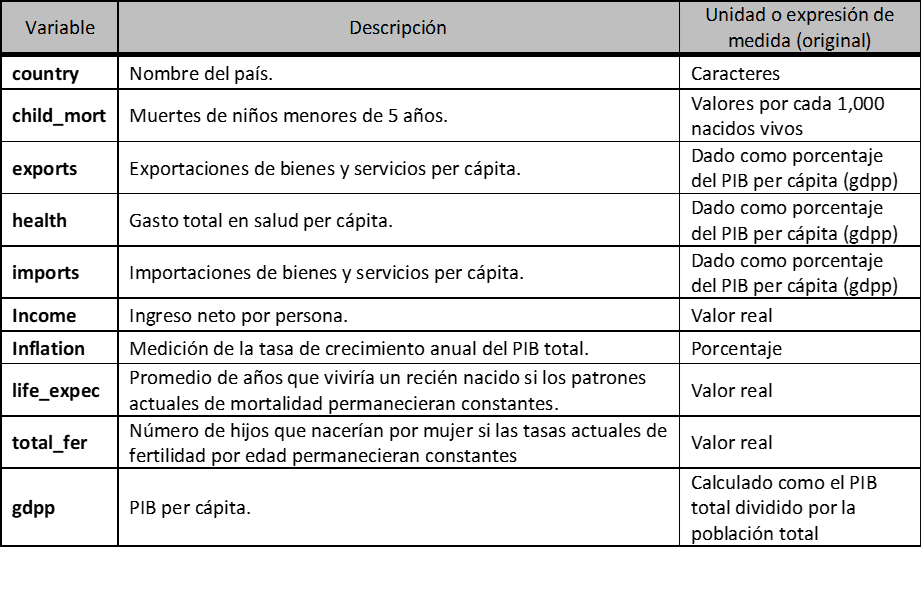



# Carga de librerías y paquetes principales

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

# Carga de datos

In [ ]:
# Opción 1: Selección de archivo de datos desde máquina local
uploaded = files.upload() # seleccionar archivo 'Country-data.csv'

# Convertir los datos en un Dataframe
df = pd.read_csv('Country-data.csv')

Saving Country-data.csv to Country-data.csv


In [ ]:
# Opción 2: Carga de datos con API de Kaggle
# Hay que ingresar "My Account">"API">"Create New API Token"
# Esto descarga un archivo kaggle.json con "username" y "key"
files.upload() # se selecciona el archivo kaggle.json

# Configuración de API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Descargar el dataset desde Kaggle
!kaggle datasets download -d rohan0301/unsupervised-learning-on-country-data

# Descomprimir el archivo
!unzip unsupervised-learning-on-country-data.zip

# Convertir los datos en un DataFrame
df = pd.read_csv('Country-data.csv')

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data
License(s): MIT
  0% 0.00/5.21k [00:00<?, ?B/s]
100% 5.21k/5.21k [00:00<00:00, 10.0MB/s]
Archive:  unsupervised-learning-on-country-data.zip
  inflating: Country-data.csv        
  inflating: data-dictionary.csv     


# Análisis Exploratorio de Datos

En este apartado, analizo el material empírico de manera preliminar. El flujo de trabajo sigue una lógica que intenta asegurar la calidad de los datos en diferentes momentos (iterativos). En este sentido, me baso en la estructura expuesta [aquí](https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4//) por Elgabry (2019) para la "higiene de datos"  y sobre todo en la visión de los epiciclos analíticos presentada en [The Art of Data Science](https://bookdown.org/rdpeng/artofdatascience///) (2017) por Peng y Matsui.

## Dimensiones y características generales

In [ ]:
# Dimensiones
dimensiones = df.shape
print(f"La base de datos contiene {dimensiones[0]} observaciones (países) y {dimensiones[1]} columnas o variables.")

# Información general y tipo de datos
df.info()

# Primeras filas del dataset
df.head()

La base de datos contiene 167 observaciones (países) y 10 columnas o variables.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [ ]:
# Valores únicos
unique = df.nunique().sort_values()
unique_values = df.apply(lambda x: x.unique())
pd.DataFrame({'Cantidad de valores únicos': unique, 'Valores únicos': unique_values})

Cantidad de valores únicos  \
child_mort                         139   
country                            167   
exports                            147   
gdpp                               157   
health                             147   
imports                            151   
income                             156   
inflation                          156   
life_expec                         127   
total_fer                          138   

                                               Valores únicos  
child_mort  [90.2, 16.6, 27.3, 119.0, 10.3, 14.5, 18.1, 4....  
country     [Afghanistan, Albania, Algeria, Angola, Antigu...  
exports     [10.0, 28.0, 38.4, 62.3, 45.5, 18.9, 20.8, 19....  
gdpp        [553, 4090, 4460, 3530, 12200, 10300, 3220, 51...  
health      [7.58, 6.55, 4.17, 2.85, 6.03, 8.1, 4.4, 8.73,...  
imports     [44.9, 48.6, 31.4, 42.9, 58.9, 16.0, 45.3, 20....  
income      [1610, 9930, 12900, 5900, 19100, 18700, 6700, ...  
inflation   [9.44, 4.49, 16.1, 22.4, 1.44, 20.9, 7.77, 1.1...  
life_expec  [56.2, 76.3, 76.5, 60.1, 76.8, 75.8, 73.3, 82....  
total_fer   [5.82, 1.65, 2.89, 6.16, 2.13, 2.37, 1.69, 1.9...

## Datos faltantes

Datos faltantes por variable:
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


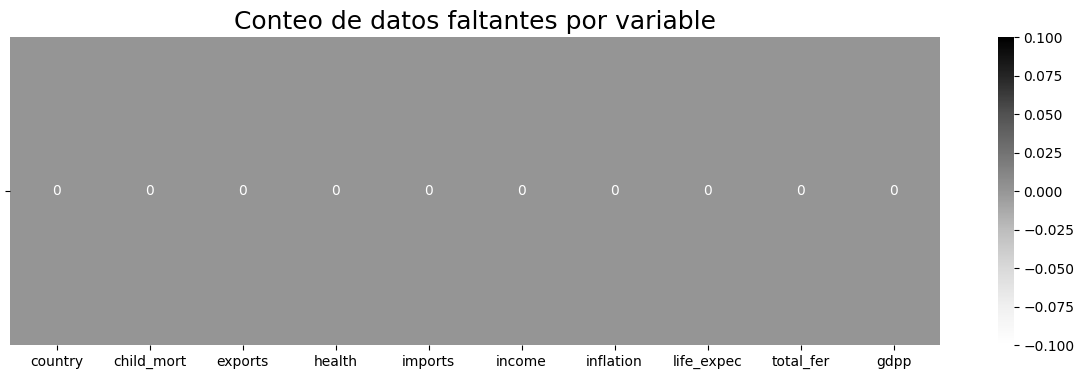

<Axes: >

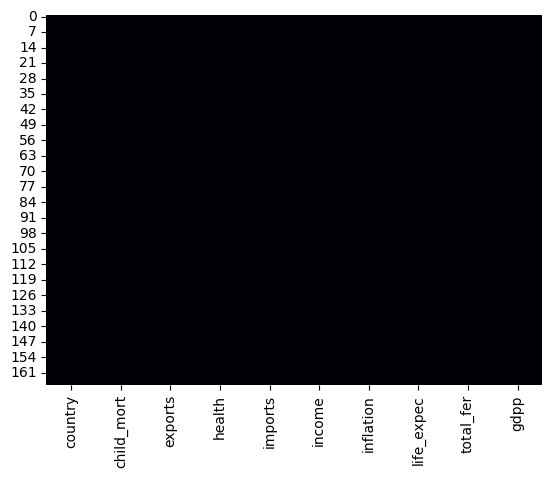

In [ ]:
# Chequeo de NAs
missing_values = df.isnull().sum()
print(f"Datos faltantes por variable:\n{missing_values}")

# Visualización
plt.figure(figsize=(15,4))
sns.heatmap((df.isna().sum()).to_frame(name='').T,cmap='Greys', annot=True,
             fmt='0.0f').set_title('Conteo de datos faltantes por variable', fontsize=18)
plt.show()

sns.heatmap(df.isnull(),cmap = 'magma',cbar = False)

## Duplicados

In [ ]:
# Detección de filas que tienen los mismos valores en todas o en variables seleccionadas.
print('Número de observaciones (filas) duplicadas: ' , len(df[df.duplicated()]))

Número de observaciones (filas) duplicadas:  0


## Estadísticas descriptivas de las variables

In [ ]:
# Primer vistazo de estadísticos resumen
df.describe()[1:].T.style.background_gradient(cmap='Blues', axis=1)

## Distribuciones (histogramas de las variables)

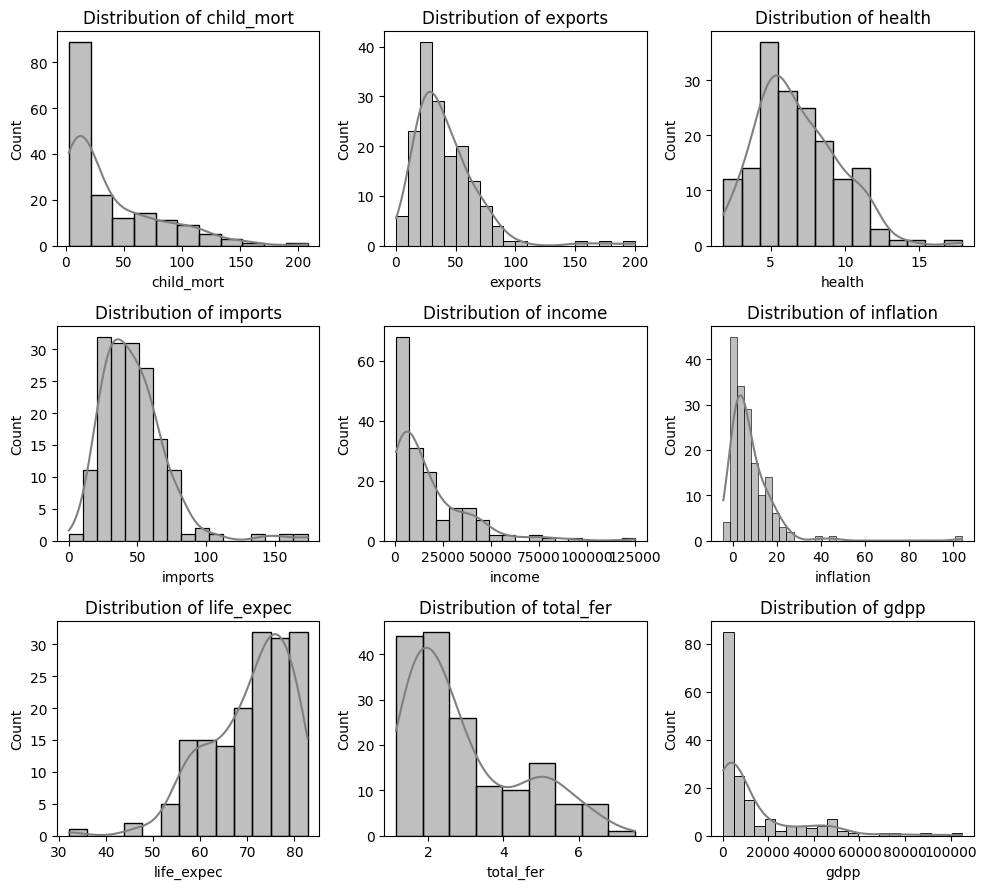

In [ ]:
# Configuración de la figura en matplotlib
plt.figure(figsize=(10, 9))

# Histogramas para cada variable
for i, col in enumerate(df.columns[1:], 1):  # sin la variable "Country"
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color='grey', line_kws={'color': 'lightblue'})  # KDE line in red, bars in skyblue
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


# Pandas Profiling Report (inicial)

In [ ]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

ProfileReport(df, minimal=True, progress_bar=False, samples=None, correlations=None, interactions=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '600px'}}, html={'style':{'primary_color': '#583101'}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 60.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a7023930c6ea40cc13d1b3e7d88799ae7cd5277edbc69a1ffd6760bc7a0396a0
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


# Transformaciones

### De porcentajes a valores reales (imports, exports, health)

In [ ]:
# De porcentajes a valores absolutos para procesar  interpretar y comparar magnitudes reales: 'imports', 'exports', 'health' están expresadas como porcentajes del 'gdpp' (PIB per cápita de cada país).

# Hacemos una regla de tres con esas variables.

df_transformed = df.copy() # nuevo DataFrame para evitar modificar la raw data
df_transformed['health'] = df_transformed['health'] * df_transformed['gdpp']/100
df_transformed['exports'] = df_transformed['exports'] * df_transformed['gdpp']/100
df_transformed['imports'] = df_transformed['imports'] * df_transformed['gdpp']/100
df_transformed

country  child_mort  exports    health   imports  income  \
0            Afghanistan        90.2    55.30   41.9174   248.297    1610   
1                Albania        16.6  1145.20  267.8950  1987.740    9930   
2                Algeria        27.3  1712.64  185.9820  1400.440   12900   
3                 Angola       119.0  2199.19  100.6050  1514.370    5900   
4    Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   
..                   ...         ...      ...       ...       ...     ...   
162              Vanuatu        29.2  1384.02  155.9250  1565.190    2950   
163            Venezuela        17.1  3847.50  662.8500  2376.000   16500   
164              Vietnam        23.3   943.20   89.6040  1050.620    4490   
165                Yemen        56.3   393.00   67.8580   450.640    4480   
166               Zambia        83.1   540.20   85.9940   451.140    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

### Nueva variable: agrupación de países por continentes

In [ ]:
# Estrategia y código tomado de Melissa Monfared (2024) en https://www.kaggle.com/code/melissamonfared/country-clustering-eda-pca?scriptVersionId=178972750&cellId=40

# Extracción de información sobre continentes desde la web
url = "https://statisticstimes.com/geography/countries-by-continents.php"
continent_data = pd.read_html(url, match="Continent")[0]

# Selección de columnas: nombre del país o área y continente respectivo
continent_data = continent_data[["Country or Area", "Continent"]]

# Junte de las bases de datos a través de la variable 'country'
df_joint_1 = pd.merge(df_transformed, continent_data, left_on="country", right_on="Country or Area", how="left")

# Verificación de países sin continente asignado
unmatched_countries = df_joint_1[df_joint_1['Continent'].isna()]['country']

# Nombre de países sin match
print("Países sin continente asignado:")
print(len(df_joint_1[df_joint_1['Continent'].isna()]['country']))
print(unmatched_countries)

Países sin continente asignado:
22
19                            Bolivia
23                             Brunei
30                         Cape Verde
37                   Congo, Dem. Rep.
38                        Congo, Rep.
40                      Cote d'Ivoire
43                     Czech Republic
71                               Iran
83                    Kyrgyz Republic
84                                Lao
92                     Macedonia, FYR
101             Micronesia, Fed. Sts.
102                           Moldova
125                            Russia
134                   Slovak Republic
138                       South Korea
141    St. Vincent and the Grenadines
147                          Tanzania
158                    United Kingdom
159                     United States
163                         Venezuela
164                           Vietnam
Name: country, dtype: object


In [ ]:
# Solución: completar manualmente

# DataFrame coyuntural indexado por país para completar las asignaciones
continent_fill = pd.DataFrame(
    {
        "Bolivia": "South America",
        "Brunei": "Asia",
        "Ivory Coast": "Africa",
        "Cape Verde": "Oceania",
        "Congo, Dem. Rep.": "Africa",
        "Congo, Rep.": "Africa",
        "Czech Republic": "Europe",
        "Kyrgyz Republic": "Asia",
        "Iran": "Asia",
        "Lao": "Asia",
        "Macedonia, FYR": "Europe",
        "Micronesia, Fed. Sts.": "Oceania",
        "Moldova": "Europe",
        "Russia": "Europe",
        "South Korea": "Asia",
        "St. Vincent and the Grenadines": "North America",
        "United Kingdom": "Europe",
        "United States": "North America",
        "Venezuela": "South America",
        "Vietnam": "Asia",
        "Cote d'Ivoire": "Africa",
        "Slovak Republic": "Europe",
        "Tanzania": "Africa"
    },
    index=["country"]
)

# Arreglo de columnas a filas y se agrega nombre a la columna de continente
continent_fill = continent_fill.melt(var_name="country", value_name="Compleción manual")

In [ ]:
# Nuevo junte de las bases
df_joint_2 = pd.merge(df_joint_1, continent_fill, on="country", how='left')
# Relleno de valores faltantes
df_joint_2["Continent"] = df_joint_2["Continent"].fillna(df_joint_2["Compleción manual"])
# Elimanción de columnas incidentales ahora
df_clean = df_joint_2.drop(columns=["Compleción manual", "Country or Area"])
# Conteo de países agrupados en continente
print(df_clean["Continent"].value_counts(dropna=False))
# Suma del conteo
counts_df_clean = df_clean["Continent"].value_counts(dropna=False)
counts_df_clean.sum()

Continent
Africa           46
Asia             45
Europe           39
North America    15
South America    12
Oceania          10
Name: count, dtype: int64


167

Obviamente, vemos que no están todos los países del mundo. Además, la clasificación no es precisa (p. ej. América es un solo continente y se divide en dos aquí, pero en los demás continentes no se hace algo así). Hubiera sido mejor una clasificación consistente e intermedia entre regiones y continentes (p. ej. para tener mejor análisis de asimetrías...economías de territorios remotos... las islas...en el Caribe, etc).

## Asociaciones

### Matriz de correlaciones

In [ ]:
df_clean

country  child_mort  exports    health   imports  income  \
0            Afghanistan        90.2    55.30   41.9174   248.297    1610   
1                Albania        16.6  1145.20  267.8950  1987.740    9930   
2                Algeria        27.3  1712.64  185.9820  1400.440   12900   
3                 Angola       119.0  2199.19  100.6050  1514.370    5900   
4    Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   
..                   ...         ...      ...       ...       ...     ...   
162              Vanuatu        29.2  1384.02  155.9250  1565.190    2950   
163            Venezuela        17.1  3847.50  662.8500  2376.000   16500   
164              Vietnam        23.3   943.20   89.6040  1050.620    4490   
165                Yemen        56.3   393.00   67.8580   450.640    4480   
166               Zambia        83.1   540.20   85.9940   451.140    3280   

     inflation  life_expec  total_fer   gdpp      Continent  
0         9.44        56.2       5.82    553           Asia  
1         4.49        76.3       1.65   4090         Europe  
2        16.10        76.5       2.89   4460         Africa  
3        22.40        60.1       6.16   3530         Africa  
4         1.44        76.8       2.13  12200  North America  
..         ...         ...        ...    ...            ...  
162       2.62        63.0       3.50   2970        Oceania  
163      45.90        75.4       2.47  13500  South America  
164      12.10        73.1       1.95   1310           Asia  
165      23.60        67.5       4.67   1310           Asia  
166      14.00        52.0       5.40   1460         Africa  

[167 rows x 11 columns]

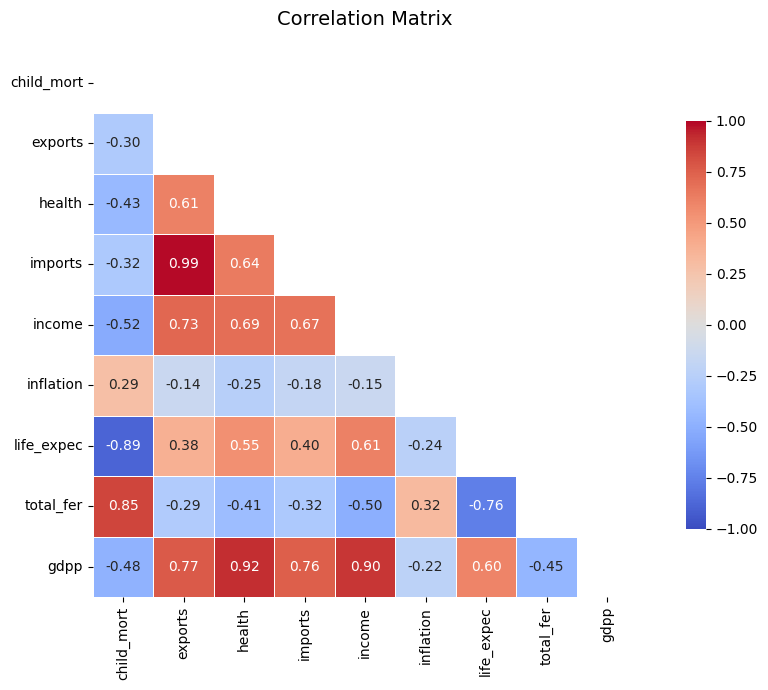

In [ ]:
# Sólo variables numéricas
corr_matrix = df_clean.corr(numeric_only=True)

# Mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 7))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, square=True, cbar_kws={"shrink": 0.75}, vmin=-1, vmax=1)

# Add title
plt.title('Correlation Matrix', fontsize=14, pad=20)

# Show plot
plt.tight_layout()
plt.show()


### Tabla de correlaciones

In [ ]:
# Unstack the correlation matrix and reset the index to create a DataFrame
corr_pairs = corr_matrix.unstack().reset_index()

# Rename the columns for clarity
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Remove self-correlations (where Variable 1 equals Variable 2)
corr_pairs = corr_pairs[corr_pairs['Variable 1'] != corr_pairs['Variable 2']]

# Drop duplicate pairs (e.g., 'A vs B' and 'B vs A')
corr_pairs['Abs Correlation'] = corr_pairs['Correlation'].abs()  # Work with absolute values for sorting
corr_pairs = corr_pairs.drop_duplicates(subset=['Abs Correlation'])

# Sort the pairs by correlation in descending order
sorted_corr_pairs = corr_pairs.sort_values(by='Correlation', ascending=False).drop(columns='Abs Correlation')

# Display the sorted correlation pairs
print(sorted_corr_pairs)

    Variable 1  Variable 2  Correlation
12     exports     imports     0.987686
26      health        gdpp     0.916593
44      income        gdpp     0.895571
7   child_mort   total_fer     0.848478
17     exports        gdpp     0.768894
35     imports        gdpp     0.755114
13     exports      income     0.725351
22      health      income     0.690857
31     imports      income     0.672056
21      health     imports     0.638581
11     exports      health     0.612919
42      income  life_expec     0.611962
62  life_expec        gdpp     0.600089
24      health  life_expec     0.545626
33     imports  life_expec     0.397515
15     exports  life_expec     0.377694
52   inflation   total_fer     0.316921
5   child_mort   inflation     0.288276
14     exports   inflation    -0.141553
41      income   inflation    -0.147756
32     imports   inflation    -0.179458
53   inflation        gdpp    -0.221631
51   inflation  life_expec    -0.239705
23      health   inflation    -0.253956


### Visualizaciones (parejas de variables)



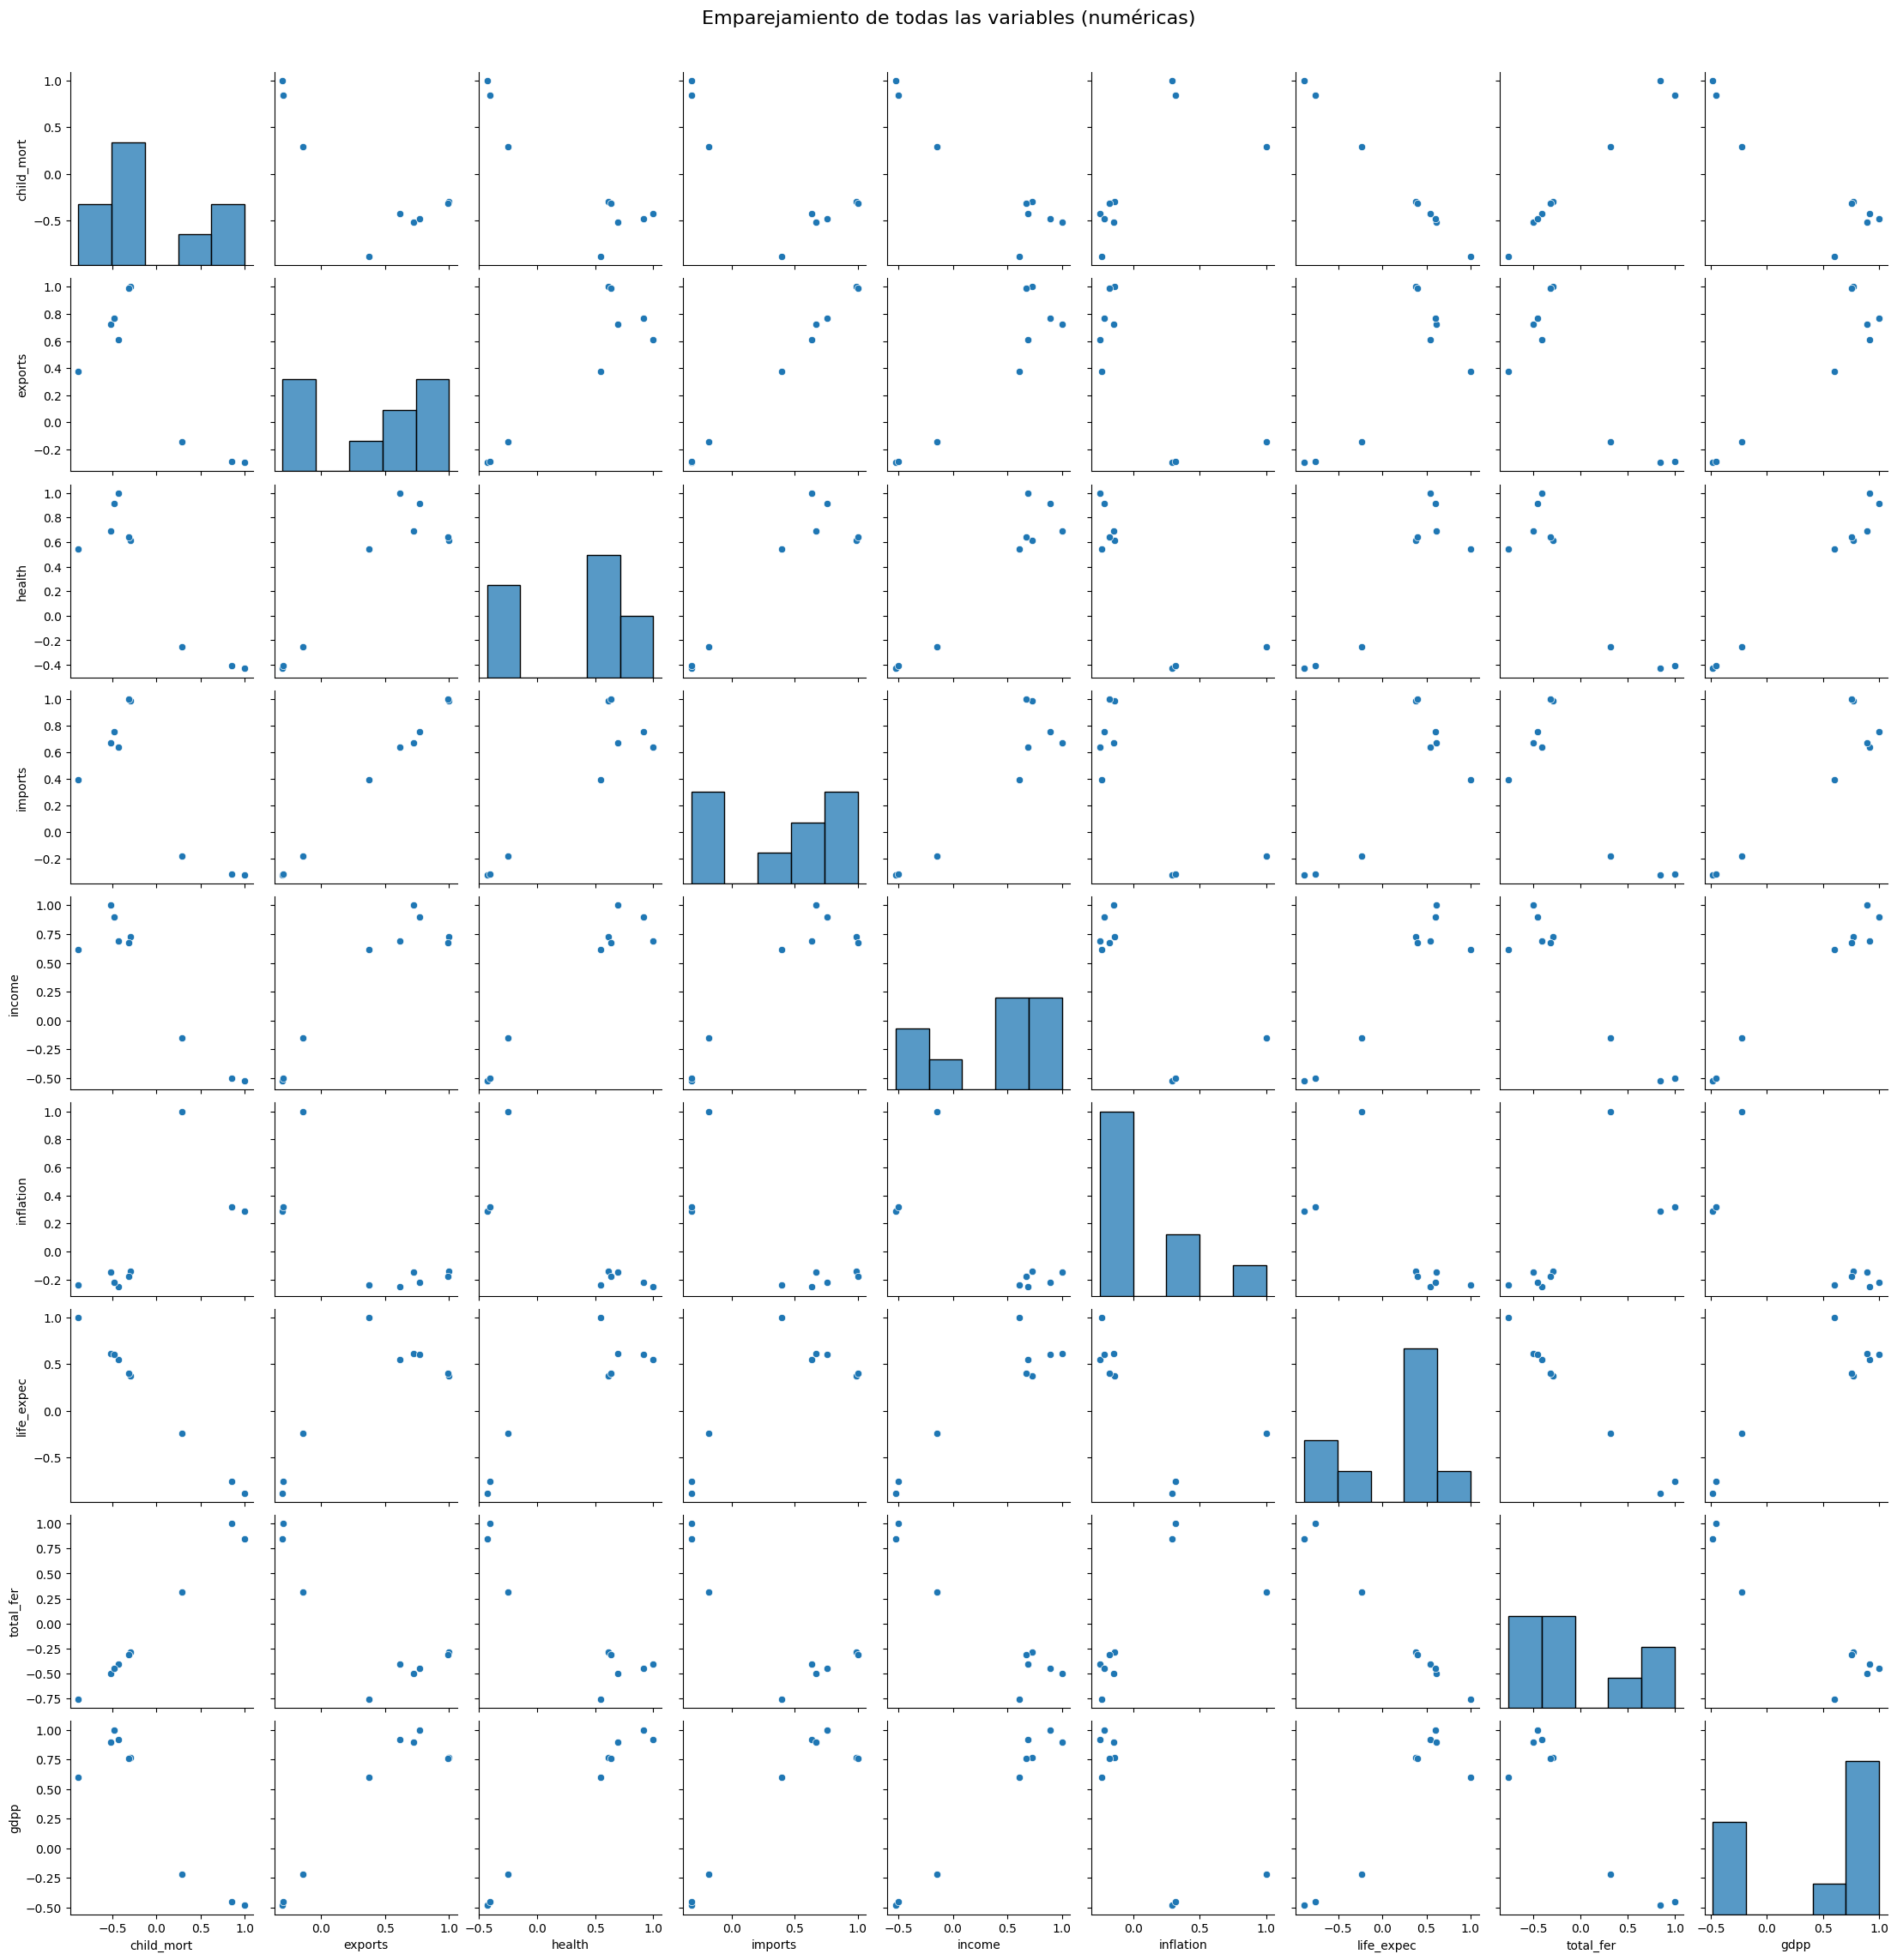

In [ ]:
# Todas las variables numéricas

sns.pairplot(corr_matrix)
plt.suptitle('Emparejamiento de todas las variables (numéricas)', y=1.02, fontsize=16)
plt.show()

#### Consideraciones  

*   `imports` y `exports` están extremamente
correlacionadas. Una posible explicación es que los países que tienen economías abiertas y orientadas al comercio tienden a importar y exportar en grandes volúmenes, lo que genera una relación directa entre estas dos variables (y promueve una interdependencia).

* `gdpp` tiene una correlación significativa con la `health` y `income`. Los países más ricos tienden a invertir más en salud y tener mejores sistemas. Y, el `gdpp` es una función directa del `income` de la gente.

* ` child_mort` se correlaciona significativamente con `life_expec` (negativamente, la esperanza se vida se alarga cuando menos niños han muerto) y `total_fer` (positivamente, entre más niños nacen pues más pueden morir).

* Si los factores económicos `income`, `gdpp`, `exports` decrecen e `inflation` sube, eso impacta negativamente a `life_expec` y `child_mort`.

* Por el contrario, entre más `health` hay más `life_expec` y menos `child_mort`.

* Una relación interesante es la que existe entre `life_expec` y `income`, están asociadas positivamente de una manera moderada.

* `inflation` tiene las correlaciones más bajas con otras variables.

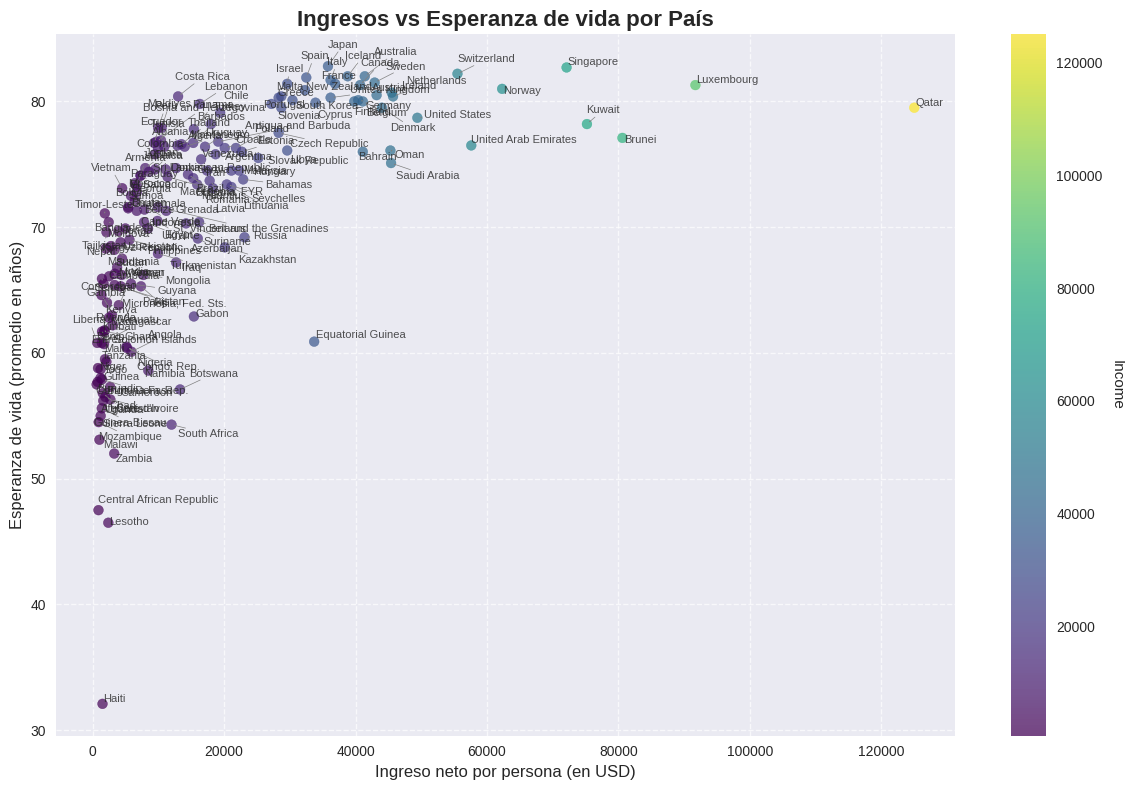

CPU times: user 4.64 s, sys: 406 ms, total: 5.05 s
Wall time: 8.22 s


In [ ]:
# @title life_expec vs income
%%time
!pip install adjustText
from adjustText import adjust_text

# Estilo seaborn
plt.style.use('seaborn')

# Configurar figura
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot para 'income' vs 'life_expec'
scatter = ax.scatter(df_clean['income'], df_clean['life_expec'], s=50, alpha=0.7, c=df['income'], cmap='viridis')

# Cada punto con el nombre del país
texts = []
for i, row in df.iterrows():
    texts.append(ax.text(row['income'], row['life_expec'], row['country'], fontsize=8, alpha=0.8))

# Ajuste de texto debido al elevado número de observaciones
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

# Configuración de márgenes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Rótulos y títulos
ax.set_xlabel('Ingreso neto por persona (en USD)', fontsize=12)
ax.set_ylabel('Esperanza de vida (promedio en años)', fontsize=12)
ax.set_title('Ingresos vs Esperanza de vida por País', fontsize=16, fontweight='bold')

# Colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Income', rotation=270, labelpad=15)

# Rótulos (configuraciónes avanzadas)
ax.tick_params(axis='both', which='major', labelsize=10)

# Grid
ax.grid(True, linestyle='--', alpha=0.7)

# Ajuste de display
plt.tight_layout()
plt.show()

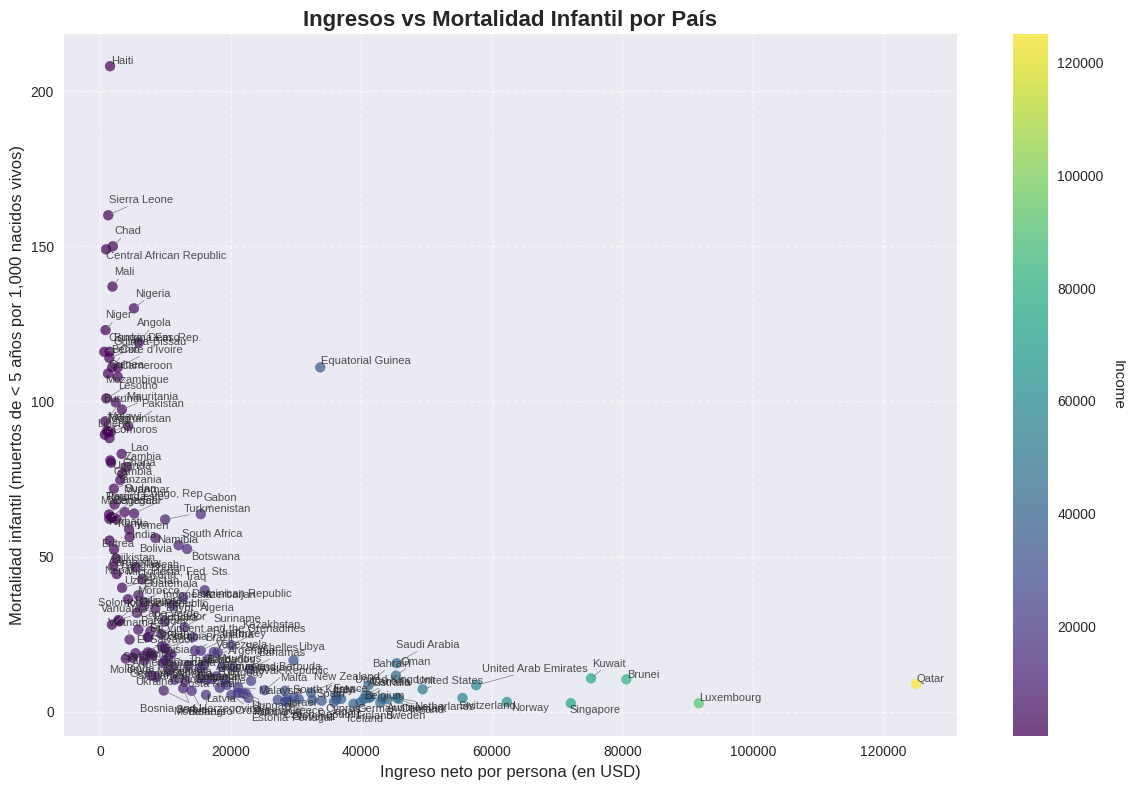

CPU times: user 5.76 s, sys: 262 ms, total: 6.02 s
Wall time: 9.38 s


In [ ]:
# @title child_mort vs income
%%time

# Estilo seaborn
plt.style.use('seaborn')

# Configurar figura
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot para 'income' vs 'child_mort'
scatter = ax.scatter(df_clean['income'], df_clean['child_mort'], s=50, alpha=0.7, c=df['income'], cmap='viridis')

# Cada punto con el nombre del país
texts = []
for i, row in df.iterrows():
    texts.append(ax.text(row['income'], row['child_mort'], row['country'], fontsize=8, alpha=0.8))

# Ajuste de texto debido al elevado número de observaciones
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

# Configuración de márgenes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Rótulos y títulos
ax.set_xlabel('Ingreso neto por persona (en USD)', fontsize=12)
ax.set_ylabel('Mortalidad infantil (muertos de < 5 años por 1,000 nacidos vivos)', fontsize=12)
ax.set_title('Ingresos vs Mortalidad Infantil por País', fontsize=16, fontweight='bold')

# Colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Income', rotation=270, labelpad=15)

# Rótulos (configuraciónes avanzadas)
ax.tick_params(axis='both', which='major', labelsize=10)

# Grid
ax.grid(True, linestyle='--', alpha=0.7)

# Ajuste de display
plt.tight_layout()
plt.show()


### Outliers

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Definición de columnas y filas
num_cols = 3
num_rows = -(-len(df_clean.columns[1:-1]) // num_cols)  # Número de filas necesarias

# Crear subgráfica con espacio para las variables
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=df_clean.columns[1:-1])

# Añadir cada boxplot a la subgráfica correspondiente
for i, col in enumerate(df_clean.columns[1:-1], 1):  # Empezar en 1 para filas/columnas
    row = (i - 1) // num_cols + 1
    col_num = (i - 1) % num_cols + 1
    fig.add_trace(
        go.Box(y=df_clean[col], name=col, text=df_clean['country'], hoverinfo='text+y'),
        row=row, col=col_num
    )

# Diseño y ajustar el tamaño de la figura
fig.update_layout(
    height=400 * num_rows,  # altura en función de las filas
    width=1200,  # ancho total
    title_text="Interactive Boxplots for Each Variable",
    showlegend=False
)

# Mostrar
fig.show()


### Visualizaciones varias

In [ ]:
!pip install -U kaleido
import kaleido
import plotly.express as px
for i in df_clean.drop('country', axis=1).columns:
    fig = px.choropleth(df_clean, locationmode='country names', locations='country',projection='kavrayskiy7',
                         title=i+' Per Country',color=i,color_continuous_scale="Teal")
    fig.update_geos(fitbounds="locations", visible=True)
    fig.show(engine='kaleido')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.1 MB/s eta 0:00:00


In [ ]:
fig = px.box(df_clean, x='Continent', y='income',
             title='Distribución de ingreso neto por persona por Continente',
             labels={'Continent': 'Continent', 'income': 'income'},
             color='Continent',points="all",
             height=400,template='plotly_white')
fig.update_layout(xaxis_title='Continent', yaxis_title='income')
fig.show()

In [ ]:
fig = px.box(df_clean, x='Continent', y='life_expec',
             title='Distribución de esperanza de vida por Continente',
             labels={'Continent': 'Continent', 'life_expec': 'life_expec'},
             color='Continent',points="all",
             height=400,template='plotly_white')
fig.update_layout(xaxis_title='Continent', yaxis_title='life_expec')
fig.show()

In [ ]:
fig = px.box(df_clean, x='Continent', y='inflation',
             title='Distribución de inflación por Continente',
             labels={'Continent': 'Continent', 'inflation': 'inflation'},
             color='Continent',points="all",
             height=400,template='plotly_white')
fig.update_layout(xaxis_title='Continent', yaxis_title='inflation')
fig.show()

In [ ]:
fig = px.box(df_clean, x='Continent', y='child_mort',
             title='Distribución de mortalidad infantil por Continente',
             labels={'Continent': 'Continent', 'child_mort': 'child_mort'},
             color='Continent',points="all",
             height=400,template='plotly_white')
fig.update_layout(xaxis_title='Continent', yaxis_title='child_mort')
fig.show()

In [ ]:
fig = px.box(df_clean, x='Continent', y='exports',
             title='Distribución de exportaciones por Continente',
             labels={'Continent': 'Continent', 'exports': 'exports'},
             color='Continent',points="all",
             height=400,template='plotly_white')
fig.update_layout(xaxis_title='Continent', yaxis_title='exports')
fig.show()

In [ ]:
fig = px.scatter_3d(df_clean, x='income', y='health', z='life_expec', color='Continent', opacity=0.7,template = 'plotly_white')
fig.update_traces(marker=dict(size=5))
fig.show()

Al parecer un combinación de altos ingresos netos por persona y un mayor gasto en salud, tiende a alargar la esperanza de vida.  

# Pandas Profiling Report (final)

In [ ]:
ProfileReport(df_clean, minimal=True, progress_bar=False, samples=None, correlations=None, interactions=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '600px'}}, html={'style':{'primary_color': '#583101'}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

# Modelado

### Estandarización de los datos (escala común y centrar)

Debido a que las variables originales (o variables estadísticas) no tienen los mismos rangos ni escalas, entonces se estandarizan antes de aplicar los algoritmos de aprendizaje automático (en este caso, relativos a la reducción de dimensionalidad y modelos de agrupamiento) - que pueden ser sensibles a estos elementos (Greenacre et al., 2022).

Aquí uso StandardScaler como técnica de preprocesamiento que transforma los datos para que cada característica (columna, indicador o variable) tenga una media de 0 y una varianza de 1 (ibid.).

La estandarización se hace restando la media y dividiendo entre la desviación estándar de cada columna. El propósito de esto es asegurar que todas las variables contribuyan de manera equitativa al modelo, en lugar de que aquellas con valores más grandes tengan más peso.

In [ ]:
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Se quitan la variables de texto y se estandarizan los datos
df_clean_copy = df_clean.copy()
df_clean_copy = df_clean_copy.set_index(keys= 'country', drop=True).drop('Continent', axis=1)
scaler = StandardScaler().fit(df_clean_copy)
df_scaled = scaler.transform(df_clean_copy)

# Convertir a un DataFrame limpio y escalado para modelar
df_clean_scaled = pd.DataFrame(df_scaled, columns = df_clean_copy.columns, index =df_clean_copy.index[:])

In [ ]:
df_clean_scaled

child_mort   exports    health   imports    income  \
country                                                                   
Afghanistan            1.291532 -0.411011 -0.565040 -0.432276 -0.808245   
Albania               -0.538949 -0.350191 -0.439218 -0.313677 -0.375369   
Algeria               -0.272833 -0.318526 -0.484826 -0.353720 -0.220844   
Angola                 2.007808 -0.291375 -0.532363 -0.345953 -0.585043   
Antigua and Barbuda   -0.695634 -0.104331 -0.178771  0.040735  0.101732   
...                         ...       ...       ...       ...       ...   
Vanuatu               -0.225578 -0.336864 -0.501562 -0.342488 -0.738527   
Venezuela             -0.526514 -0.199393 -0.219310 -0.287205 -0.033542   
Vietnam               -0.372315 -0.361463 -0.538488 -0.377572 -0.658404   
Yemen                  0.448417 -0.392166 -0.550596 -0.418479 -0.658924   
Zambia                 1.114951 -0.383952 -0.540498 -0.418445 -0.721358   

                     inflation  life_expec  total_fer      gdpp  
country                                                          
Afghanistan           0.157336   -1.619092   1.902882 -0.679180  
Albania              -0.312347    0.647866  -0.859973 -0.485623  
Algeria               0.789274    0.670423  -0.038404 -0.465376  
Angola                1.387054   -1.179234   2.128151 -0.516268  
Antigua and Barbuda  -0.601749    0.704258  -0.541946 -0.041817  
...                        ...         ...        ...       ...  
Vanuatu              -0.489784   -0.852161   0.365754 -0.546913  
Venezuela             3.616865    0.546361  -0.316678  0.029323  
Vietnam               0.409732    0.286958  -0.661206 -0.637754  
Yemen                 1.500916   -0.344633   1.140944 -0.637754  
Zambia                0.590015   -2.092785   1.624609 -0.629546  

[167 rows x 9 columns]

In [ ]:
# Comprobación de medias y varianzas

medias_post = np.mean(df_clean_scaled, axis=0)
varianzas_post = np.var(df_clean_scaled, axis=0)

print("Media de los datos escalados:\n", medias_post)
print("Varianza de los datos escalados:\n", varianzas_post)

Media de los datos escalados:
 child_mort   -3.722904e-17
exports       6.382120e-17
health       -2.659217e-17
imports       4.254747e-17
income       -7.977650e-17
inflation    -1.063687e-17
life_expec    3.696311e-16
total_fer     3.044803e-16
gdpp          5.850277e-17
dtype: float64
Varianza de los datos escalados:
 child_mort    1.0
exports       1.0
health        1.0
imports       1.0
income        1.0
inflation     1.0
life_expec    1.0
total_fer     1.0
gdpp          1.0
dtype: float64


Debido a la precisión numérica (de los floating-points) y a las características de los datos originales (p.ej., su distribución), las medias no son exactamente 0. Sin embargo, después de aplicar StandardScaler los valores están muy cerca a esos conceptos ideales de estandarización y las pequeñas desviaciones son normales y no afectan el proceso de escalado.



In [ ]:
# Suma de las varianzas

print("La varianza total en este caso es:\n", df_clean_scaled.var().sum())

La varianza total en este caso es:
 9.05421686746988


### Reducción de dimensionalidad:

En términos algebraicos 'low-rank matrix approximation' (rank 2) desde otra matriz con rango más alto, mientras se preserva la información esencial (Greenacre et. al, 2022; StatisticalSongs, 2011).

### PCA

El PCA (Principal Component Analysis) es una técnica estadística multivariada que transforma las variables originales de un conjunto de datos en nuevas variables llamadas componentes principales, las cuales retienen la mayor varianza posible de todas esas variables iniciales (Greenacre et al., 2022).

Estas nuevas componentes son combinaciones lineales de las variables originales y se ordenan de manera que la primera componente captura la mayor cantidad de varianza, la segunda la segunda mayor cantidad, y así sucesivamente, con cada componente adicional siendo ortogonal a las anteriores (no correlacionadas para capturar features distintos de los datos) (StatQuest with Josh Starmer, 2018). Esto implica una transformación del espacio de coordenadas original, definido por las variables del conjunto de datos, a un nuevo espacio de coordenadas, definido por las componentes principales (ibid.).

En este nuevo espacio, las componentes principales actúan como los nuevos ejes (direcciones) que facilitan la reducción de dimensionalidad, la visualización, la eliminación de ruido y la identificación de patrones subyacentes en conjuntos de datos (ibid.). La técnica fue desarrollada por Karl Pearson en 1901 y posteriormente generalizada por Harold Hotelling en 1933 (IBM Technology, 2024).

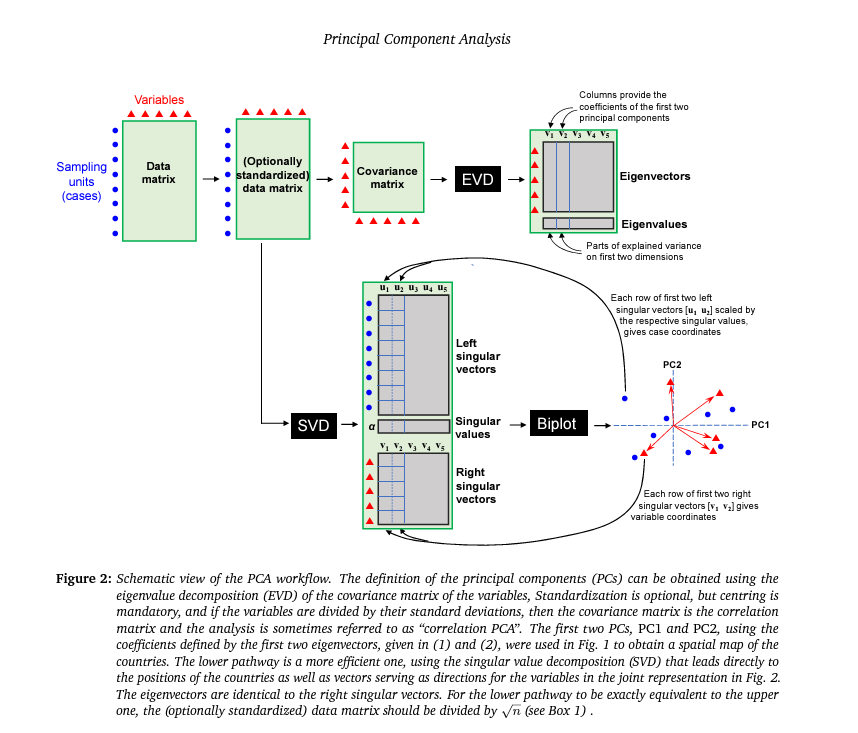


Tomado de Greenacre et al. (2022: 3).

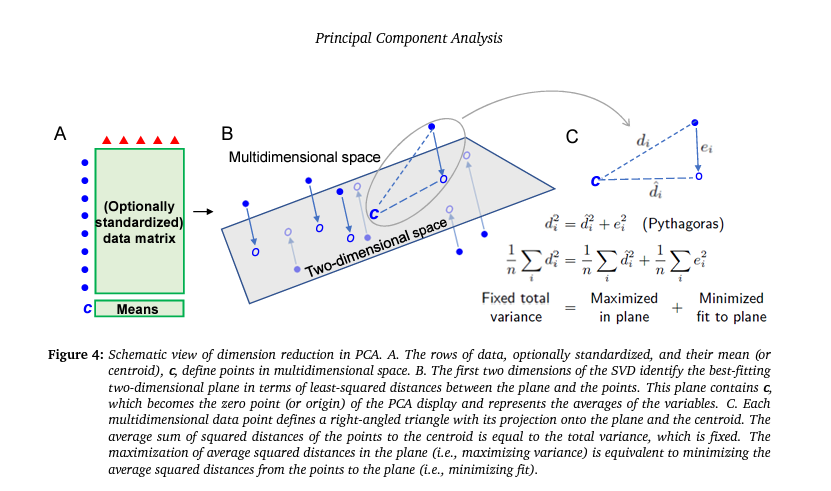

Tomado de Greenacre et al. (2022: 7).

In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px

# Objeto PCA con n_components=None que retiene todas las componentes. En este caso serían 9, porque hay 9 dimensiones (variables)
pca = PCA(n_components=None)

In [ ]:
type(pca)

sklearn.decomposition._pca.PCA

In [ ]:
# Aplicación de PCA. Resulta en un Fortran-ordered array de datos transformados en el espacio de los componentes principales
model_dim_red_pca = pca.fit_transform(df_clean_scaled)

Aquí se ajusta el modelo PCA a los datos y se transforman a un nuevo espacio de componentes principales. Aquí el PCA está basado en el método de Singular Value Decomposition (SVD).

El SVD descompone la matriz de datos inicial en tres matrices:

𝑋
=
𝑈
Σ
𝑉
𝑇
X=UΣV
T

Donde:

𝑋
X es la matriz original de datos escalados (df_clean_scaled).
𝑈
U es una matriz de vectores singulares de la izquierda (básicamente las direcciones principales en el espacio de los datos originales).
Σ
Σ es una matriz diagonal que contiene los valores singulares, que están relacionados con la importancia (o varianza explicada) de cada componente principal.
𝑉
𝑇
V
T
  es la matriz de vectores singulares de la derecha (las direcciones principales en el espacio de las variables originales).

¿Qué hace PCA?:

PCA toma la matriz
𝑉
𝑇
de SVD, que contiene los "autovectores" (vectores que definen las direcciones principales) del conjunto de datos.
Multiplica tu matriz original por los primeros
𝑘
k vectores singulares (donde
𝑘
k es el número de componentes principales que deseas retener). En este caso, como no has especificado
𝑘
k, retiene todos.
El resultado es una proyección de los datos originales en el nuevo espacio definido por estas direcciones principales, lo que se denomina espacio de componentes principales.
Entonces, fit_transform realiza dos operaciones:

Ajusta: Encuentra los vectores principales (autovectores) y calcula la varianza explicada por cada componente (valores singulares).
Transforma: Proyecta tus datos en este nuevo espacio reducido.

In [ ]:
model_dim_red_pca

array([[-2.63557499e+00,  1.47226739e+00, -5.49488868e-01, ...,
        -4.02106673e-01, -1.52246778e-02, -2.14526223e-02],
       [-2.42055643e-02, -1.42989187e+00, -1.41232909e-02, ...,
         2.62749660e-01, -3.75846547e-04,  3.38831728e-02],
       [-4.59557398e-01, -6.75495376e-01,  9.59354680e-01, ...,
         2.26680500e-01, -4.17041908e-02,  3.26636757e-02],
       ...,
       [-5.94449148e-01, -1.07633467e+00,  5.28874919e-01, ...,
         1.27676529e-01,  3.75433341e-02,  7.38600849e-02],
       [-1.80237235e+00,  5.88729402e-01,  1.18085099e+00, ...,
        -1.30849147e-01, -1.19704727e-02,  6.63306309e-03],
       [-2.64450479e+00,  1.57195347e+00, -1.74684997e-01, ...,
        -7.51162884e-01, -5.94382085e-03, -3.54065192e-02]])

In [ ]:
# DataFrame con las componentes principales
df_pca = pd.DataFrame(model_dim_red_pca, columns=[f'PC{i+1}' for i in range(model_dim_red_pca.shape[1])], index=df_clean_copy.index)

El resultado es un DataFrame donde:

*   Cada fila es una observación (país)
*   Cada columna es un PC
*   Los valores son las coordenadas (principales) de cada país en el espacio de los PCs

In [ ]:
df_pca

PC1       PC2       PC3       PC4       PC5  \
country                                                                 
Afghanistan         -2.635575  1.472267 -0.549489  0.242326  0.023530   
Albania             -0.024206 -1.429892 -0.014123 -0.450645 -0.125821   
Algeria             -0.459557 -0.675495  0.959355 -0.218456 -0.113275   
Angola              -2.722630  2.172332  0.600215  0.433978  0.005433   
Antigua and Barbuda  0.648597 -1.023437 -0.257430 -0.289201  0.072694   
...                       ...       ...       ...       ...       ...   
Vanuatu             -1.175210 -0.275652 -0.667131 -0.279628 -0.119733   
Venezuela           -0.314228 -0.016266  3.680273 -0.011835 -0.460468   
Vietnam             -0.594449 -1.076335  0.528875 -0.508854 -0.328297   
Yemen               -1.802372  0.588729  1.180851  0.020241 -0.315724   
Zambia              -2.644505  1.571953 -0.174685  0.178965  0.081814   

                          PC6       PC7       PC8       PC9  
country                                                      
Afghanistan          0.295663 -0.402107 -0.015225 -0.021453  
Albania             -0.059231  0.262750 -0.000376  0.033883  
Algeria              0.415597  0.226681 -0.041704  0.032664  
Angola               0.450064  0.296409  0.002103 -0.029095  
Antigua and Barbuda  0.240630  0.054647  0.009627 -0.089558  
...                       ...       ...       ...       ...  
Vanuatu             -0.056193 -0.687250  0.084313  0.018204  
Venezuela           -0.181382 -0.068043  0.192189 -0.000312  
Vietnam             -0.219081  0.127677  0.037543  0.073860  
Yemen                0.490287 -0.130849 -0.011970  0.006633  
Zambia              -0.206057 -0.751163 -0.005944 -0.035407  

[167 rows x 9 columns]

In [ ]:
#@title Varianza explicada por cada componente principal


print(f"Varianza explicada por cada componente principal: {pca.explained_variance_}") # cantidad de varianza que cada componente principal captura del conjunto de datos original. Los valores están en la misma escala que los datos originales (después de la estandarización)

explained_variance_ratio = pca.explained_variance_ratio_
print(f"Varianza (ratio) explicada por cada componente principal: {explained_variance_ratio}") # varianza explicada por cada componente dividida por la varianza total. Los valores son proporciones (o porcentajes si se multiplican por 100) y siempre suman 1 (o 100%).

# Gráfico de la varianza explicada acumulada

explained_variance_cumulative = explained_variance_ratio.cumsum()
fig = px.line(
    x=[f'PC{i+1}' for i in range(len(explained_variance_cumulative))],
    y=explained_variance_cumulative,
    title="Varianza explicada acumulada por las componentes principales",
    labels={'x': 'Componentes principales', 'y': 'Varianza explicada acumulada'}
)
fig.add_scatter(
    x=[f'PC{i+1}' for i in range(len(explained_variance_cumulative))],
    y=explained_variance_cumulative,
    mode='markers'
)
fig.show()

Varianza explicada por cada componente principal: [5.33631081e+00 1.67006556e+00 8.97406142e-01 5.49797220e-01
 2.74267850e-01 2.22718073e-01 8.50864327e-02 1.40921616e-02
 4.47261467e-03]
Varianza (ratio) explicada por cada componente principal: [5.89372984e-01 1.84451685e-01 9.91147170e-02 6.07227801e-02
 3.02917253e-02 2.45982702e-02 9.39743701e-03 1.55641971e-03
 4.93981394e-04]


El número de PCs es igual al número de variables - se repite el proceso hasta completar el 100% de la varianza explicada.   

Según Greenacre et al. (2022:2), 'la estandarización permite que los coeficientes de las variables o cargas, muestren la fuerza de la contribución a un componente principal'. Y que, 'sus signos indican la influencia negativa o positiva' (ibid.). O sea, las cargas pueden interpretarse como correlaciones entre cada variable original y la PC respectiva.

In [ ]:
#@title Interpretación: Carga de las variables en cada componente

pca_loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])], index=df_clean_scaled.columns) # matriz de cargas transpuesta
print("Cargas de las variables en las componentes principales:")
print(pca_loadings)

Cargas de las variables en las componentes principales:
                 PC1       PC2       PC3       PC4       PC5       PC6  \
child_mort -0.316392  0.476267 -0.150012  0.148052  0.101995 -0.196585   
exports     0.342887  0.397311 -0.030574 -0.449425 -0.038538  0.038911   
health      0.358535  0.155053 -0.075703  0.599712 -0.493200 -0.180699   
imports     0.344865  0.370781 -0.072174 -0.461798 -0.252787  0.012180   
income      0.380041  0.128384  0.145764  0.154806  0.794075  0.038147   
inflation  -0.143085  0.221261  0.948419  0.007628 -0.136423 -0.108403   
life_expec  0.343857 -0.369820  0.196752  0.018395 -0.154041  0.586010   
total_fer  -0.302842  0.459715 -0.077834  0.213928 -0.020336  0.753901   
gdpp        0.399988  0.200624  0.010339  0.364772  0.087501 -0.045382   

                 PC7       PC8       PC9  
child_mort  0.761267 -0.006444  0.004951  
exports    -0.013670  0.055264  0.717924  
health     -0.064616 -0.430072  0.130346  
imports     0.027182 -0.131135 

In [33]:
# Obtener la varianza explicada por cada componente en porcentaje
explained_variance_ratio = pca.explained_variance_ratio_ * 100  # Convertir a porcentaje

# Crear un DataFrame para organizar la información
pca_contrib_df = pd.DataFrame()

# Iterar sobre cada componente principal
for i in range(len(explained_variance_ratio)):
    component = pca_loadings.iloc[:, i].sort_values(ascending=False)  # Ordenar contribuciones en orden descendente
    component_name = f'PC{i+1} ({explained_variance_ratio[i]:.2f}% varianza explicada)'
    pca_contrib_df[component_name] = component  # Agregar la columna con las cargas y varianza explicada

# Mostrar el DataFrame organizado
pca_contrib_df


PC1 (58.94% varianza explicada)  PC2 (18.45% varianza explicada)  \
gdpp                               0.399988                         0.200624   
income                             0.380041                         0.128384   
health                             0.358535                         0.155053   
imports                            0.344865                         0.370781   
life_expec                         0.343857                        -0.369820   
exports                            0.342887                         0.397311   
inflation                         -0.143085                         0.221261   
total_fer                         -0.302842                         0.459715   
child_mort                        -0.316392                         0.476267   

            PC3 (9.91% varianza explicada)  PC4 (6.07% varianza explicada)  \
gdpp                              0.010339                        0.364772   
income                            0.145764                        0.154806   
health                           -0.075703                        0.599712   
imports                          -0.072174                       -0.461798   
life_expec                        0.196752                        0.018395   
exports                          -0.030574                       -0.449425   
inflation                         0.948419                        0.007628   
total_fer                        -0.077834                        0.213928   
child_mort                       -0.150012                        0.148052   

            PC5 (3.03% varianza explicada)  PC6 (2.46% varianza explicada)  \
gdpp                              0.087501                       -0.045382   
income                            0.794075                        0.038147   
health                           -0.493200                       -0.180699   
imports                          -0.252787                        0.012180   
life_expec                       -0.154041                        0.586010   
exports                          -0.038538                        0.038911   
inflation                        -0.136423                       -0.108403   
total_fer                        -0.020336                        0.753901   
child_mort                        0.101995                       -0.196585   

            PC7 (0.94% varianza explicada)  PC8 (0.16% varianza explicada)  \
gdpp                             -0.044023                        0.799022   
income                           -0.023113                       -0.393811   
health                           -0.064616                       -0.430072   
imports                           0.027182                       -0.131135   
life_expec                        0.581208                       -0.002966   
exports                          -0.013670                        0.055264   
inflation                        -0.022077                        0.006070   
total_fer                        -0.273145                       -0.034293   
child_mort                        0.761267                       -0.006444   

            PC9 (0.05% varianza explicada)  
gdpp                             -0.128464  
income                           -0.079011  
health                            0.130346  
imports                          -0.665687  
life_expec                        0.031594  
exports                           0.717924  
inflation                        -0.011281  
total_fer                        -0.023682  
child_mort                        0.004951

En palabras de Greenacre et. al (2022), se puede pensar en PC1 como crear una nueva variable (resumen) que se correlaciona lo más posible con todas las variables originales al mismo tiempo. Esta nueva variable (PC1) captura la mayor cantidad de información compartida entre las 9 variables originales, representando así la esencia o el "factor común" más importante de todos los datos. Es como encontrar el "hilo conductor" en una sola dimensión.

Por lo tanto, si cada una de estas nueve variables, que tienen una varianza de 1, se somete a una regresión con el PC1, sus varianzas explicadas (comúnmente representadas como R²) y siendo iguales a sus correlaciones al cuadrado con el PC1 son:

= 0.399988 `gdpp` + 0.380041 `income` +  0.358535 `health`+ 0.344865 `imports` + 0.343857 `life_expec` +	0.342887 `exports` - 0.143085 `inflation` - 0.302842 `total_fer` - 0.316392 `child_mort`

Donde, la mayor contribución la hace `gdpp`.

Y, la suma de estos R² dividido por el total de variables 9, es

In [32]:
import numpy as np

# Matriz de covarianza de los datos
cov_matrix = np.cov(df_clean_scaled, rowvar=False)

# Calcular los eigenvalores y eigenvectores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Varianza total (suma de todos los eigenvalores)
total_variance = np.sum(eigenvalues)

# Varianza explicada por cada componente principal
otra_forma_explained_variance_ratio = eigenvalues / total_variance

# Varianza explicada por PC1
varianza_PC1 = explained_variance_ratio[0]

print("Matriz de covarianza:\n", cov_matrix)
print("Eigenvalues:\n"eigenvalues)
print("Eigenvectors:\n"eigenvectors)
print("Varianza total:\n"total_variance)
print("Varianza explicada por cada PC:\n"otra_forma_explained_variance_ratio)
print("Varianza explicada por PC1:\n"varianza_PC1)

[[ 1.0060241  -0.29902078 -0.43303092 -0.32106013 -0.52747354  0.29001277
  -0.89201752  0.85358942 -0.485942  ]
 [-0.29902078  1.0060241   0.61661082  0.99363602  0.72972099 -0.14240581
   0.37996936 -0.29284952  0.77352564]
 [-0.43303092  0.61661082  1.0060241   0.6424278   0.69501914 -0.25548605
   0.5489131  -0.41044155  0.92211502]
 [-0.32106013  0.99363602  0.6424278   1.0060241   0.6761047  -0.18053926
   0.39990995 -0.3189708   0.75966324]
 [-0.52747354  0.72972099  0.69501914  0.6761047   1.0060241  -0.14864609
   0.61564899 -0.50486319  0.90096644]
 [ 0.29001277 -0.14240581 -0.25548605 -0.18053926 -0.14864609  1.0060241
  -0.24114897  0.31883023 -0.22296618]
 [-0.89201752  0.37996936  0.5489131   0.39990995  0.61564899 -0.24114897
   1.0060241  -0.76545827  0.60370413]
 [ 0.85358942 -0.29284952 -0.41044155 -0.3189708  -0.50486319  0.31883023
  -0.76545827  1.0060241  -0.45765069]
 [-0.485942    0.77352564  0.92211502  0.75966324  0.90096644 -0.22296618
   0.60370413 -0.457650

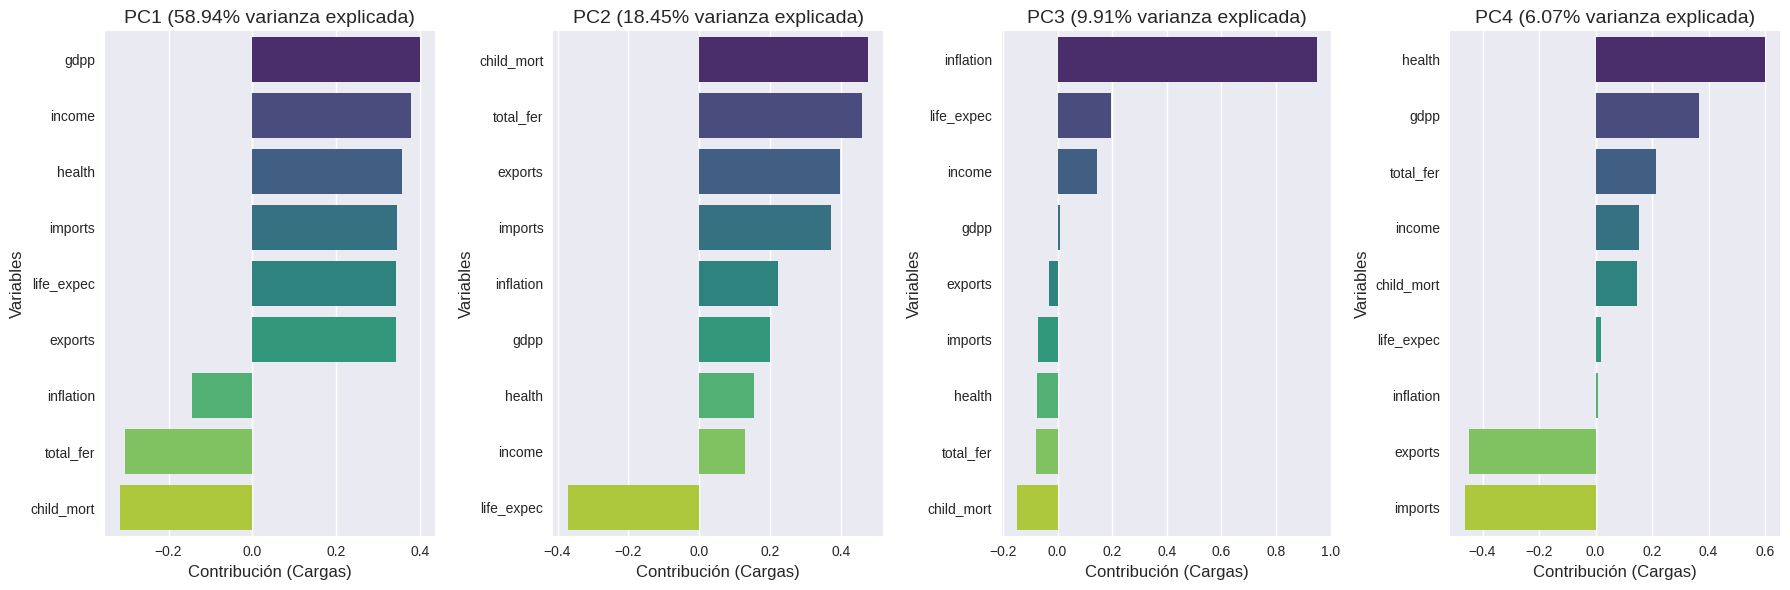

In [ ]:
# Crear una figura con subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 6))  # Subplots para las primeras 4 componentes

# Iterar sobre las primeras 4 componentes principales
for i in range(4):
    # Ordenar las contribuciones de las variables en orden descendente para la componente actual
    component = pca_loadings.iloc[:, i].sort_values(ascending=False)

    # Crear un gráfico de barras para cada componente
    sns.barplot(x=component.values, y=component.index, ax=axes[i], palette="viridis")

    # Configurar los títulos y etiquetas
    axes[i].set_title(f'PC{i+1} ({explained_variance_ratio[i]:.2f}% varianza explicada)', fontsize=14)
    axes[i].set_xlabel('Contribución (Cargas)', fontsize=12)
    axes[i].set_ylabel('Variables', fontsize=12)

# Ajustar diseño para que no se superpongan los gráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### Consideraciones:
Según los resultados, las 4 primeras componentes principales retienen y explican ~95% de varianza de los datos. De acuerdo con las cargas de encontradas en esas componentes tenemos que:

* PC1: relativa al "Desarrollo Económico". Esta componente está fuertemente influenciada por indicadores de desarrollo económico y bienestar, como el PIB per cápita, los ingresos y el gasto en salud. La esperanza de vida también contribuye positivamente, sugiriendo que estos países tienden a tener economías estables y sistemas de salud eficientes. Por otro lado, la alta mortalidad infantil, la tasa de fertilidad y la inflación están negativamente correlacionadas, indicando que los países con alta puntuación en esta componente generalmente presentan menores problemas de salud infantil, tasas de fertilidad controladas y baja inflación.

* PC2: relativa al "Bienestar Social y Disparidad Económica". Esta componente sugiere una dualidad entre el bienestar social y la actividad económica. La alta mortalidad infantil y la tasa de fertilidad elevada indican desafíos en términos de salud y desarrollo social. A su vez, las exportaciones e importaciones contribuyen positivamente, lo que sugiere que, a pesar de los problemas sociales, existe un cierto nivel de actividad económica. La relación negativa con la esperanza de vida implica que los países con alta puntuación en esta componente tienden a tener una menor longevidad debido a los problemas sociales. Podría apuntar a la desigualdad social en contexto de comercio activo.

* PC3: "Inflación y Sostenibilidad del Desarrollo". La inflación domina esta componente. Los países con alta puntuación en esta componente enfrentan problemas de estabilidad económica (el valor de su moneda es débil), a pesar de tener una ligera asociación positiva con la esperanza de vida y los ingresos. Las relaciones negativas con la mortalidad infantil, la tasa de fertilidad y el gasto en salud sugieren que estos países pueden haber logrado cierta sostenibilidad en estos indicadores sociales, pero el alto nivel de inflación podría amenazar este progreso. Podrían ser economías en crecimiento.

* PC4: "Inversión en Salud versus Competitividad Económica". Hay una fuerte inversión en salud y una correlación positiva con el PIB per cápita, lo que sugiere que los países con alta puntuación en esta componente están priorizando el bienestar social a través de políticas de salud pública. Sin embargo, esta inversión parece estar en conflicto con la competitividad económica internacional, ya que las exportaciones e importaciones tienen una relación negativa. Esto podría implicar que estos países enfrentan desafíos para mantener una economía abierta y competitiva mientras priorizan el gasto en salud. Puede que sea un reflejo del compromiso social frente a competitividad comercial.

In [ ]:

n_components = pca.components_.shape[1]

# DataFrame con las cargas de las variables para todas las componentes principales
feature_contributions = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(n_components)],  # Crear nombres para todas las componentes
    index=df_clean_scaled.columns
)

# Obtener las top 5 features para PC1, PC2 y PC3, ordenando por valor absoluto de las cargas
top_5_features_pc1 = feature_contributions['PC1'].abs().sort_values(ascending=False).head(5)
top_5_features_pc2 = feature_contributions['PC2'].abs().sort_values(ascending=False).head(5)
top_5_features_pc3 = feature_contributions['PC3'].abs().sort_values(ascending=False).head(5)
top_5_features_pc4 = feature_contributions['PC4'].abs().sort_values(ascending=False).head(5)


# Mostrar las top 5 features de cada componente principal
print("Top 5 features que más contribuyen a PC1:")
print(top_5_features_pc1)

print("\nTop 5 features que más contribuyen a PC2:")
print(top_5_features_pc2)

print("\nTop 5 features que más contribuyen a PC3:")
print(top_5_features_pc3)

print("\nTop 5 features que más contribuyen a PC4:")
print(top_5_features_pc4)


Top 5 features que más contribuyen a PC1:
gdpp          0.399988
income        0.380041
health        0.358535
imports       0.344865
life_expec    0.343857
Name: PC1, dtype: float64

Top 5 features que más contribuyen a PC2:
child_mort    0.476267
total_fer     0.459715
exports       0.397311
imports       0.370781
life_expec    0.369820
Name: PC2, dtype: float64

Top 5 features que más contribuyen a PC3:
inflation     0.948419
life_expec    0.196752
child_mort    0.150012
income        0.145764
total_fer     0.077834
Name: PC3, dtype: float64

Top 5 features que más contribuyen a PC4:
health       0.599712
imports      0.461798
exports      0.449425
gdpp         0.364772
total_fer    0.213928
Name: PC4, dtype: float64


In [ ]:
# Ratio de la varianza explicada
bi_plot_pca_explained_variance = pca.explained_variance_ratio_

# Gráfico 2D de las dos primeras componentes principales
fig_2d = px.scatter(
    df_pca, x='PC1', y='PC2',
    title="Biplot: Las dos primeras componentes principales",
    labels={
        'PC1': f'PC1: Desarollo económico ({bi_plot_pca_explained_variance[0]:.2%})',
        'PC2': f'PC2: Bienestar en riesgo por disparidad económica ({bi_plot_pca_explained_variance[1]:.2%})'
    },
    hover_name=df_pca.index,
    hover_data={'PC1': ':.2f', 'PC2': ':.2f'}
)


fig_2d.show()

In [ ]:
# Gráfico 3D de las 3 primeras componentes principales
fig_3d = px.scatter_3d(
    df_pca, x='PC1', y='PC2', z='PC3',
    opacity=0.3,
    template='plotly_white',
    title="Visualización 3D de las tres primeras componentes principales",
      labels={
        'PC1':'Desarollo económico',
        'PC2':'Bienestar y disparidad económica',
        'PC3':'Inflación'
    },
    hover_name=df_pca.index
)

fig_3d.update_traces(marker=dict(size=5))


fig_3d.show()

In [ ]:
# DataFrame transformado después de PCA

# Keep only the first 4 columns and rename the remaining ones
df_4_pca = df_pca.iloc[:, :4]  # Keep only the first 4 columns

df_4_pca = df_4_pca.rename(columns={
    'PC1': 'des_eco',
    'PC2': 'bien_dipar',
    'PC3': 'infla',
    'PC4': 'gasto_salud'
})

df_4_pca


des_eco  bien_dipar     infla  gasto_salud
country                                                         
Afghanistan         -2.635575    1.472267 -0.549489     0.242326
Albania             -0.024206   -1.429892 -0.014123    -0.450645
Algeria             -0.459557   -0.675495  0.959355    -0.218456
Angola              -2.722630    2.172332  0.600215     0.433978
Antigua and Barbuda  0.648597   -1.023437 -0.257430    -0.289201
...                       ...         ...       ...          ...
Vanuatu             -1.175210   -0.275652 -0.667131    -0.279628
Venezuela           -0.314228   -0.016266  3.680273    -0.011835
Vietnam             -0.594449   -1.076335  0.528875    -0.508854
Yemen               -1.802372    0.588729  1.180851     0.020241
Zambia              -2.644505    1.571953 -0.174685     0.178965

[167 rows x 4 columns]

##t-SNE

In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.manifold import TSNE

# Aplicar t-SNE para reducir los datos a 2 dimensiones para su visualización
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(df_clean_scaled)

# Convertir los resultados a un DataFrame para la visualización
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'], index=df_clean_scaled.index)

# Visualización interactiva con Plotly
fig_tsne = px.scatter(
    df_tsne,
    x='TSNE1',
    y='TSNE2',
    title="Visualización 2D de t-SNE",
    labels={
        'TSNE1': 't-SNE Component 1',
        'TSNE2': 't-SNE Component 2'
    },
    hover_name=df_tsne.index,
    template='plotly',  # Opcional: elegir un tema de visualización
    width=800,  # Ancho del gráfico
    height=600  # Altura del gráfico
)

fig_tsne.show()


## Modelos de agrupación

###  K-means

Este es un método de agrupación no jerárquica.

##### Número apropiado de *k* (aglomeraciones)

Buscamos los centroides que caracterizan a los diferentes cúmulos.

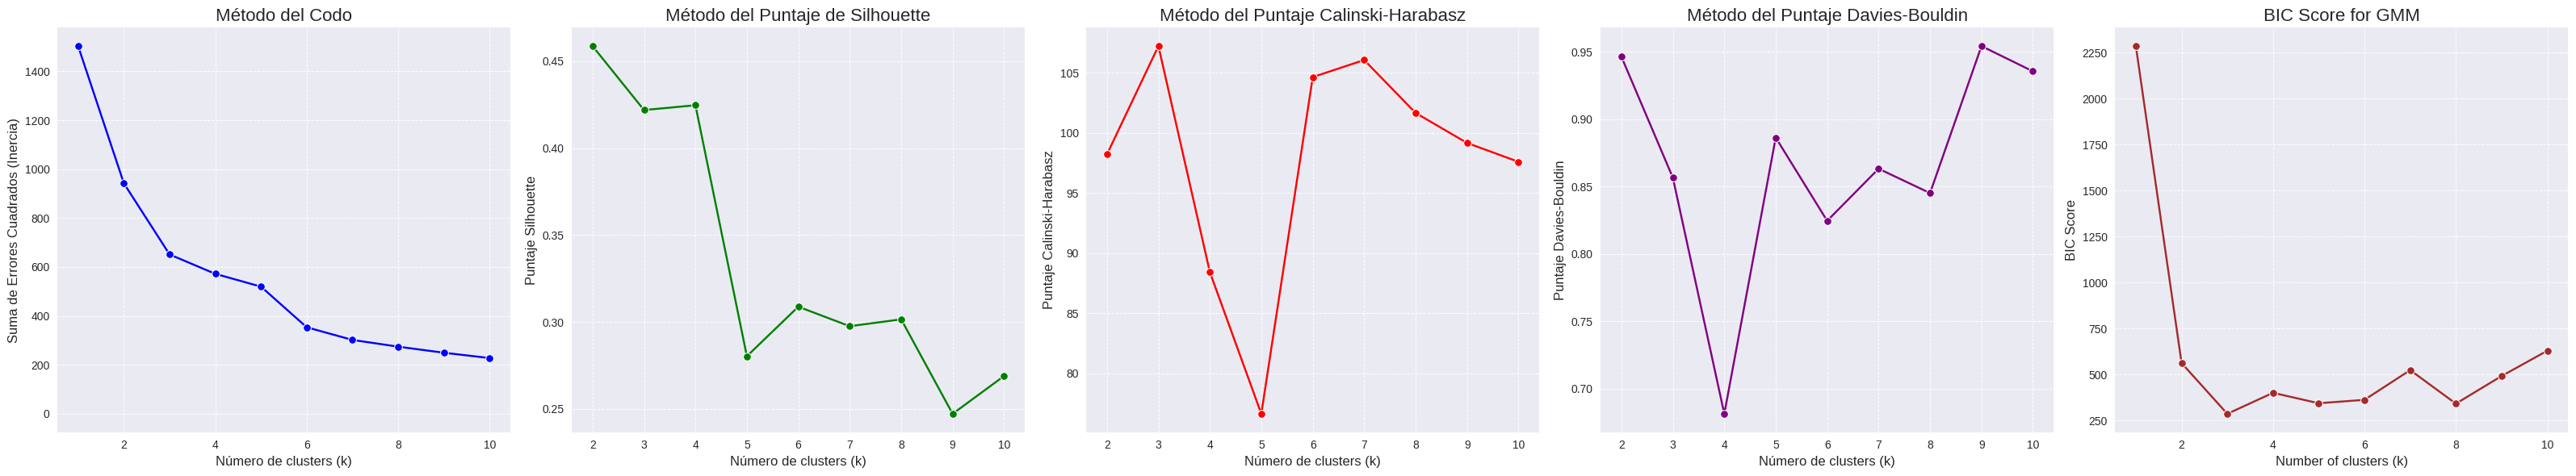

El número óptimo de clusters según el Método del Codo es: 3


In [ ]:
# Import Davies-Bouldin Score
!pip install kneed
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Configuración inicial
sse = {}
sil = []
calinski = []
davies_bouldin = []  # Nueva lista para Davies-Bouldin
bic_scores = []
kmax = 10

# Crear figura y subplots
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(32, 6))  # Ajustar para 5 subplots

# Elbow Method
for k in range(1, kmax + 1):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(df_clean_scaled)
    sse[k] = kmeans.inertia_  # Inercia: Suma de distancias a los centros más cercanos

# Usar KneeLocator para identificar el codo
x = list(sse.keys())
y = list(sse.values())
knee = KneeLocator(x, y, curve='convex', direction='decreasing')

# Gráfico Elbow Method con KneeLocator
sns.lineplot(x=x, y=y, marker='o', color='blue', ax=ax[0])
ax[0].vlines(knee.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', color='red')
ax[0].set_title('Método del Codo', fontsize=16)
ax[0].set_xlabel("Número de clusters (k)", fontsize=12)
ax[0].set_ylabel("Suma de Errores Cuadrados (Inercia)", fontsize=12)
ax[0].grid(True, which='both', linestyle='--', linewidth=0.7)

# Silhouette Score Method
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(df_clean_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_clean_scaled, labels, metric='euclidean'))

# Gráfico Silhouette Score Method
sns.lineplot(x=range(2, kmax + 1), y=sil, marker='o', color='green', ax=ax[1])
ax[1].set_title('Método del Puntaje de Silhouette', fontsize=16)
ax[1].set_xlabel("Número de clusters (k)", fontsize=12)
ax[1].set_ylabel("Puntaje Silhouette", fontsize=12)
ax[1].grid(True, which='both', linestyle='--', linewidth=0.7)

# Calinski-Harabasz Score Method
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(df_clean_scaled)
    labels = kmeans.labels_
    calinski.append(calinski_harabasz_score(df_clean_scaled, labels))

# Gráfico Calinski-Harabasz Score
sns.lineplot(x=range(2, kmax + 1), y=calinski, marker='o', color='red', ax=ax[2])
ax[2].set_title('Método del Puntaje Calinski-Harabasz', fontsize=16)
ax[2].set_xlabel("Número de clusters (k)", fontsize=12)
ax[2].set_ylabel("Puntaje Calinski-Harabasz", fontsize=12)
ax[2].grid(True, which='both', linestyle='--', linewidth=0.7)

# Davies-Bouldin Score Method
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(df_clean_scaled)
    labels = kmeans.labels_
    davies_bouldin.append(davies_bouldin_score(df_clean_scaled, labels))

# Gráfico Davies-Bouldin Score
sns.lineplot(x=range(2, kmax + 1), y=davies_bouldin, marker='o', color='purple', ax=ax[3])
ax[3].set_title('Método del Puntaje Davies-Bouldin', fontsize=16)
ax[3].set_xlabel("Número de clusters (k)", fontsize=12)
ax[3].set_ylabel("Puntaje Davies-Bouldin", fontsize=12)
ax[3].grid(True, which='both', linestyle='--', linewidth=0.7)


# Bayesian Information Criterion (BIC) with Gaussian Mixture Models (GMM)
from sklearn.mixture import GaussianMixture

for k in range(1, kmax + 1):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(df_clean_scaled)
    bic_scores.append(gmm.bic(df_clean_scaled))

# Gráfico BIC
sns.lineplot(x=range(1, kmax + 1), y=bic_scores, marker='o', color='brown', ax=ax[4])
ax[4].set_title('BIC Score for GMM', fontsize=16)
ax[4].set_xlabel("Number of clusters (k)", fontsize=12)
ax[4].set_ylabel("BIC Score", fontsize=12)
ax[4].grid(True, which='both', linestyle='--', linewidth=0.7)

optimal_k_bic = range(1, kmax + 1)[np.argmin(bic_scores)]


# Ajustar los subplots para que no se superpongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Mostrar el número óptimo de clusters según el Elbow Method
print(f"El número óptimo de clusters según el Método del Codo es: {knee.knee}")

Consideraciones:
En este análisis, se evalúan cinco métricas para determinar el número óptimo de clusters del conjunto de datos utilizando el algoritmo K-Means.

* Método del Codo: sugiere el número óptimo de clusters en el punto donde se observa una disminución notable en la inercia. El KneeLocator identifica el "codo" en el gráfico (aproximación visual), indicando el número de clusters más apropiado antes de que la reducción de la inercia se vuelva marginal.

* Puntaje Silhouette: Evalúa qué tan bien separados están los clusters y qué tan cohesionados son internamente. Un puntaje más alto indica una mejor estructura de clusters. El número de clusters óptimo corresponde al valor de k con el puntaje más alto.

* Puntaje Calinski-Harabasz: Mide la dispersión entre clusters en relación con la dispersión dentro de los clusters. Valores más altos indican una mejor separación. El número óptimo de clusters se asocia con el puntaje más alto.

* Puntaje Davies-Bouldin: Mide la relación entre la distancia media entre clusters y la variación dentro de los clusters. Un puntaje más bajo indica una mejor separación entre los clusters. El número óptimo se asocia con el puntaje mínimo.

* Criterio de Información Bayesiano (BIC): Utiliza Modelos de Mezcla Gaussiana para evaluar la adecuación del número de clusters, penalizando la complejidad del modelo. El número óptimo de clusters corresponde al valor de k con el BIC más bajo.


In [ ]:
# @title Análisis de agrupamiento

import pandas as pd
import numpy as np

# Create a dictionary to store the results
results = {
    'Num_Clusters': list(range(1, kmax + 1)),
    'Elbow_Method': list(sse.values()),
    'Silhouette_Score': [np.nan] + sil,
    'Calinski_Harabasz': [np.nan] + calinski,
    'Davies_Bouldin': [np.nan] + davies_bouldin,
    'BIC_Score': bic_scores
}

# Create the DataFrame
df_results = pd.DataFrame(results)

# Find the optimal number of clusters for each method
optimal_clusters = {
    'Elbow_Method': knee.knee,
    'Silhouette_Score': np.argmax(sil) + 2,  # +2 because Silhouette starts from k=2
    'Calinski_Harabasz': np.argmax(calinski) + 2,  # +2 because Calinski-Harabasz starts from k=2
    'Davies_Bouldin': np.argmin(davies_bouldin) + 2,  # +2 because Davies-Bouldin starts from k=2
    'BIC_Score': optimal_k_bic
}

# Create a new DataFrame with the optimal number of clusters
optimal_row = pd.DataFrame({'Num_Clusters': ['Optimal'], **{k: [v] for k, v in optimal_clusters.items()}})

# Concatenate the original DataFrame with the optimal row
df_results = pd.concat([df_results, optimal_row], ignore_index=True)

# Display the results
print(df_results.to_string(index=False))

Num_Clusters  Elbow_Method  Silhouette_Score  Calinski_Harabasz  Davies_Bouldin   BIC_Score
           1   1503.000000               NaN                NaN             NaN 2286.430318
           2    942.206601          0.458633          98.206604        0.946378  562.977457
           3    651.382052          0.421862         107.206933        0.856631  287.068210
           4    572.126620          0.424614          88.402553        0.681384  401.297830
           5    519.751473          0.280295          76.616551        0.886390  344.542246
           6    353.703134          0.308773         104.628304        0.824631  363.135161
           7    301.998492          0.297558         106.049228        0.863297  524.603791
           8    274.522756          0.301515         101.645428        0.845221  342.399389
           9    249.657031          0.247180          99.150116        0.954319  492.647830
          10    227.941889          0.268919          97.580487        0.935585 

**Decisión final con 3 de 5 "votos" de métodos *k* : 3 clusters**

#### Clustering

In [ ]:
# Inicializando el algoritmo K-means
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=42).fit(df_clean_scaled)

# Extracción de asignaciones de clusters de los datos en una lista
pred = kmeans.labels_

# Centroides (3)
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(data=centroids, columns = [df_clean_scaled.columns]).T

print("Centroid values for each cluster:")
print(centroids_df)

Centroid values for each cluster:
                   0         1         2
child_mort  1.326610 -0.826294 -0.445506
exports    -0.365042  1.317948 -0.212973
health     -0.524447  1.820945 -0.283659
imports    -0.392817  1.311116 -0.196220
income     -0.689238  1.718701 -0.165277
inflation   0.391812 -0.452334 -0.067490
life_expec -1.276276  1.123170  0.327609
total_fer   1.354342 -0.786618 -0.472342
gdpp       -0.604963  1.923532 -0.272754


In [ ]:
# Labels de centroides al DF original
df_clean_scaled['cluster'] = pred

df_pca['cluster'] = df_clean_scaled['cluster']
df_pca['country'] = df_clean_scaled.index

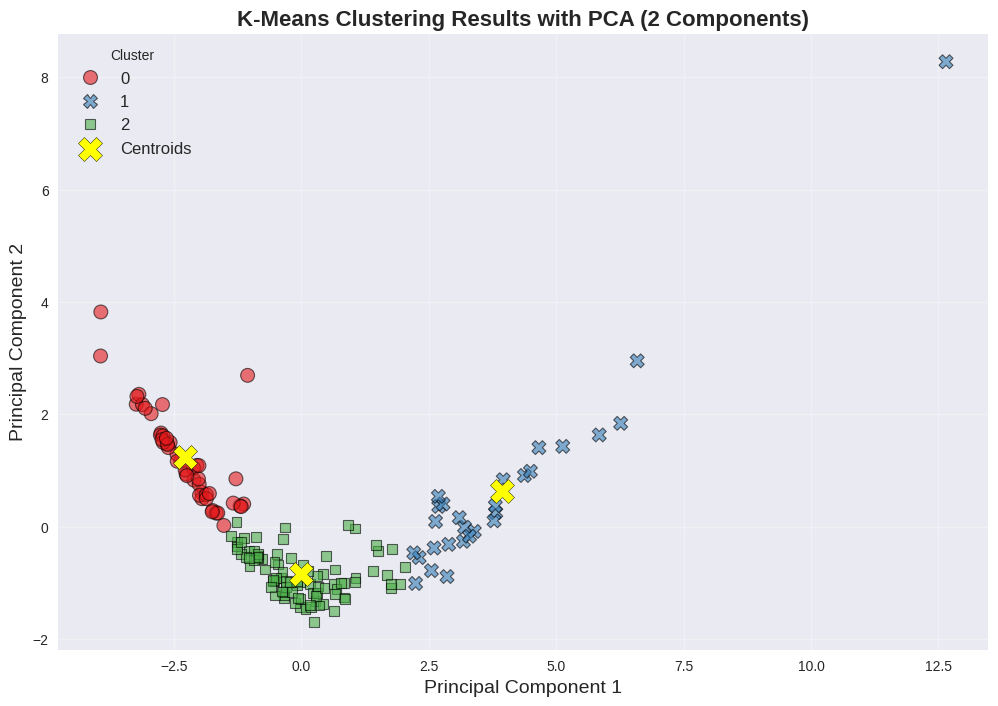

In [ ]:
# @title Visualization con PCA

# Reducing the dimensionality of the centroids to PCA space as well
centroids_pca = pca.transform(centroids)

# Creating the figure and axis objects
plt.figure(figsize=(12, 8))

# Plotting the clusters using PCA-reduced components
sns.scatterplot(x=df_pca['PC1'],
                y=df_pca['PC2'],
                hue=df_pca['cluster'],
                palette='Set1',
                style=df_pca['cluster'],
                s=100,
                edgecolor='k',
                alpha=0.6)

# Plotting centroids
plt.scatter(centroids_pca[:, 0],
            centroids_pca[:, 1],
            s=300,
            c='yellow',
            edgecolor='black',
            marker='X',
            label='Centroids')

# Adding title and labels
plt.title('K-Means Clustering Results with PCA (2 Components)', fontsize=16, weight='bold')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)

# Customizing legend and other aesthetics
plt.legend(title='Cluster', fontsize=12)
plt.grid(True, alpha=0.3)

# Show plot
plt.show()





In [ ]:
# Ensure centroids are derived from the scaled dataset without the 'cluster' column
# Drop the 'cluster' column from df_clean_scaled if it exists
if 'cluster' in df_clean_scaled.columns:
    df_clean_scaled = df_clean_scaled.drop('cluster', axis=1)

# Apply PCA on df_clean_scaled and centroids (with the correct number of features)
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_clean_scaled)

# Centroids need to be from the same feature space, so apply PCA to centroids as well
centroids_pca = pca.transform(centroids)

# Create a DataFrame for the principal components (PC1, PC2, PC3)
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2', 'PC3'])

# Add country names and cluster labels to the PCA DataFrame
df_pca['cluster'] = pred
df_pca['country'] = df_clean_scaled.index  # Assuming country names are in the index

# Create a DataFrame for the centroids in PCA space
centroids_df_pca = pd.DataFrame(data=centroids_pca, columns=['PC1', 'PC2', 'PC3'])
centroids_df_pca['cluster'] = ['Centroid'] * len(centroids_pca)

# Now you can create the interactive 3D plot
import plotly.express as px

# Create the 3D interactive scatter plot
fig = px.scatter_3d(df_pca,
                    x='PC1',
                    y='PC2',
                    z='PC3',
                    color='cluster',
                    hover_name='country',  # Shows country name on hover
                    title="K-Means Clustering with 3D PCA (Interactive)",
                    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
                    template='plotly_dark',  # Aesthetic style
                    size_max=20)

# Add centroid points as another trace in 3D
fig.add_scatter3d(x=centroids_df_pca['PC1'],
                  y=centroids_df_pca['PC2'],
                  z=centroids_df_pca['PC3'],
                  mode='markers',
                  marker=dict(symbol='x', size=10, color='yellow', line=dict(width=2, color='black')),
                  name='Centroids')

# Show the interactive 3D plot
fig.show()


In [ ]:
# Create a DataFrame for the countries and their assigned clusters
countries_clusters = pd.DataFrame({
    'Country': df_clean_scaled.index,  # Assuming country names are in the index
    'Cluster': df_pca['cluster']
})

# Group countries by clusters
countries_by_cluster = countries_clusters.groupby('Cluster')['Country'].apply(list).reset_index()

# Display the table of countries in each cluster
countries_by_cluster


Cluster                                            Country
0        0  [Afghanistan, Angola, Benin, Botswana, Burkina...
1        1  [Australia, Austria, Belgium, Brunei, Canada, ...
2        2  [Albania, Algeria, Antigua and Barbuda, Argent...

In [ ]:
# Count the number of countries per cluster
cluster_counts = countries_clusters['Cluster'].value_counts().sort_index()

# Calculate the percentage of countries in each cluster
total_countries = len(countries_clusters)
cluster_percentages = (cluster_counts / total_countries) * 100

# Combine counts and percentages into a summary DataFrame
cluster_summary = pd.DataFrame({
    'Cluster': cluster_counts.index,
    'Number of Countries': cluster_counts.values,
    'Percentage (%)': cluster_percentages.values
})

# Display the summary table
cluster_summary


Cluster  Number of Countries  Percentage (%)
0        0                   48       28.742515
1        1                   28       16.766467
2        2                   91       54.491018

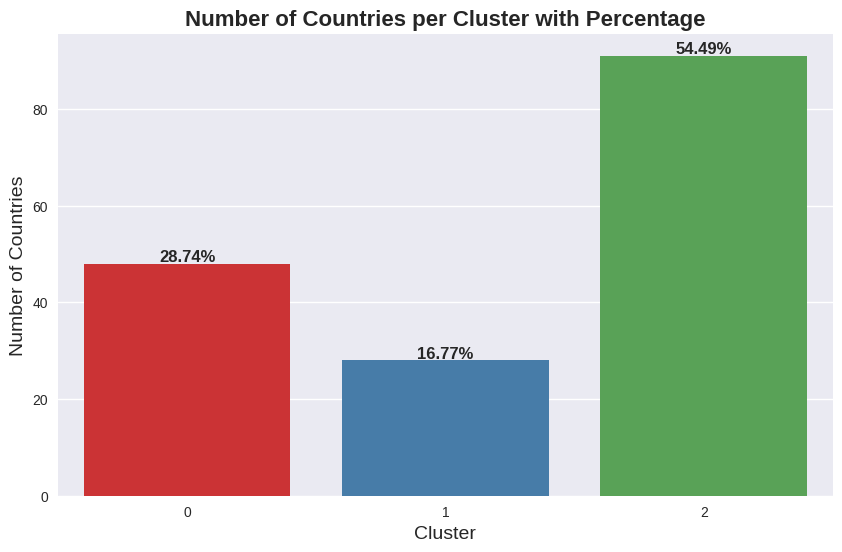

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the number of countries in each cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_summary['Cluster'],
            y=cluster_summary['Number of Countries'],
            palette='Set1')

# Adding percentage labels above the bars
for index, value in enumerate(cluster_summary['Number of Countries']):
    percentage = cluster_summary['Percentage (%)'].iloc[index]
    plt.text(index, value + 0.5, f'{percentage:.2f}%', ha='center', fontsize=12, weight='bold')

# Setting the labels and title
plt.title('Number of Countries per Cluster with Percentage', fontsize=16, weight='bold')
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Number of Countries', fontsize=14)

# Display the plot
plt.show()


Más de la mitad de los países del mundo se podría decir que están en vía de desarrollo. Sólo unos pocos están en una situación cómoda en varios indicadores y el cerca del 30% está rezagado en muchos aspectos que impactan negativamente en la existencia de sus habitantes.

### DBSCAN

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) funciona agrupando puntos muy juntos (con muchos vecinos cercanos) y marcando los puntos que se encuentran solos como ruido. Es útil cuando los grupos tienen formas y tamaños variados.

DBSCAN requiere la selección de dos parámetros clave: epsilon (la distancia máxima entre dos muestras que se considerarán vecinas) y min_samples (el número mínimo de puntos necesarios para formar una región densa).

In [ ]:
from sklearn.cluster import DBSCAN

# Selección de epsilon y min_samples
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan_labels = dbscan.fit_predict(df_clean_scaled)


In [ ]:
df_clean_scaled['dbscan_cluster'] = dbscan_labels

In [ ]:
# Display cluster labels (-1 represents noise)
print(df_clean_scaled['dbscan_cluster'].value_counts())

dbscan_cluster
 1    79
-1    54
 0    23
 2     9
 3     2
Name: count, dtype: int64


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 3 components for DBSCAN clusters
pca_dbscan = PCA(n_components=3)
df_pca_dbscan = pca_dbscan.fit_transform(df_clean_scaled)

# Create a DataFrame for the PCA-transformed data
df_pca_dbscan = pd.DataFrame(data=df_pca_dbscan, columns=['PC1', 'PC2', 'PC3'])

# Add the DBSCAN cluster labels and country names
df_pca_dbscan['dbscan_cluster'] = dbscan_labels
df_pca_dbscan['country'] = df_clean_scaled.index

# Plot the 3D scatter plot for DBSCAN clusters
fig_dbscan = px.scatter_3d(df_pca_dbscan,
                           x='PC1',
                           y='PC2',
                           z='PC3',
                           color='dbscan_cluster',
                           hover_name='country',  # Shows country names on hover
                           title="DBSCAN Clustering with 3D PCA (Interactive)",
                           labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
                           template='plotly_dark')

# Show the interactive 3D plot for DBSCAN
fig_dbscan.show()


In [ ]:
# Create a DataFrame for the countries and their assigned DBSCAN clusters
countries_dbscan_clusters = pd.DataFrame({
    'Country': df_clean_scaled.index,  # Assuming country names are in the index
    'Cluster': df_clean_scaled['dbscan_cluster']
})

# Group countries by DBSCAN clusters
dbscan_countries_by_cluster = countries_dbscan_clusters.groupby('Cluster')['Country'].apply(list).reset_index()

# Display the table of countries in each DBSCAN cluster
dbscan_countries_by_cluster


Cluster                                            Country
0       -1  [Algeria, Angola, Argentina, Austria, Bahamas,...
1        0  [Afghanistan, Benin, Burkina Faso, Burundi, Ca...
2        1  [Albania, Antigua and Barbuda, Armenia, Azerba...
3        2  [Australia, Canada, Finland, France, Germany, ...
4        3                               [Italy, New Zealand]

In [ ]:
# Count the number of countries per DBSCAN cluster
dbscan_cluster_counts = countries_dbscan_clusters['Cluster'].value_counts().sort_index()

# Calculate the percentage of countries in each DBSCAN cluster
total_dbscan_countries = len(countries_dbscan_clusters)
dbscan_cluster_percentages = (dbscan_cluster_counts / total_dbscan_countries) * 100

# Combine counts and percentages into a summary DataFrame for DBSCAN
dbscan_cluster_summary = pd.DataFrame({
    'Cluster': dbscan_cluster_counts.index,
    'Number of Countries': dbscan_cluster_counts.values,
    'Percentage (%)': dbscan_cluster_percentages.values
})

# Display the summary table
dbscan_cluster_summary


Cluster  Number of Countries  Percentage (%)
0       -1                   54       32.335329
1        0                   23       13.772455
2        1                   79       47.305389
3        2                    9        5.389222
4        3                    2        1.197605

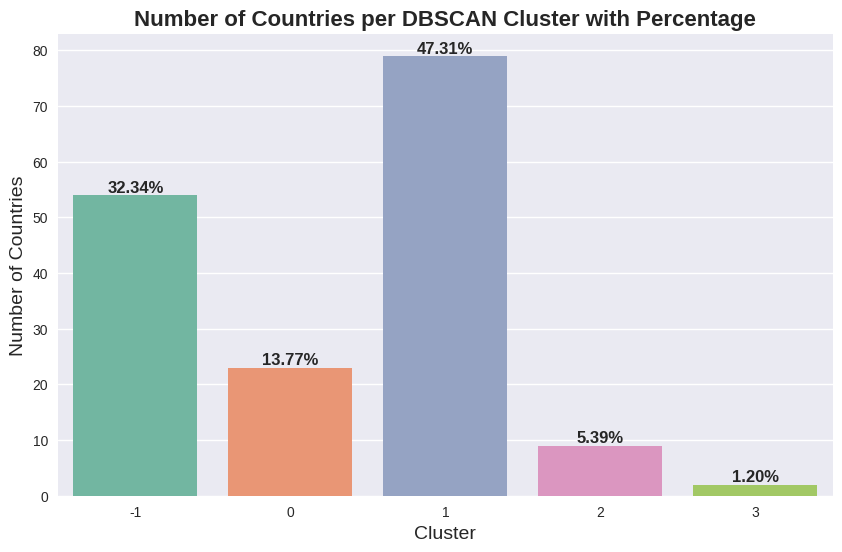

In [ ]:
# Plotting the number of countries in each DBSCAN cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=dbscan_cluster_summary['Cluster'],
            y=dbscan_cluster_summary['Number of Countries'],
            palette='Set2')

# Adding percentage labels above the bars
for index, value in enumerate(dbscan_cluster_summary['Number of Countries']):
    percentage = dbscan_cluster_summary['Percentage (%)'].iloc[index]
    plt.text(index, value + 0.5, f'{percentage:.2f}%', ha='center', fontsize=12, weight='bold')

# Setting the labels and title
plt.title('Number of Countries per DBSCAN Cluster with Percentage', fontsize=16, weight='bold')
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Number of Countries', fontsize=14)

# Display the plot
plt.show()


### Aglomerative Hierachical Clustering

La agrupación jerárquica aglomerativa comienza tratando a cada país como su propio clúster y fusiona iterativamente los pares de clústeres más cercanos hasta que todos los países estén en un solo clúster o hasta que se alcance un número predefinido de clústeres.

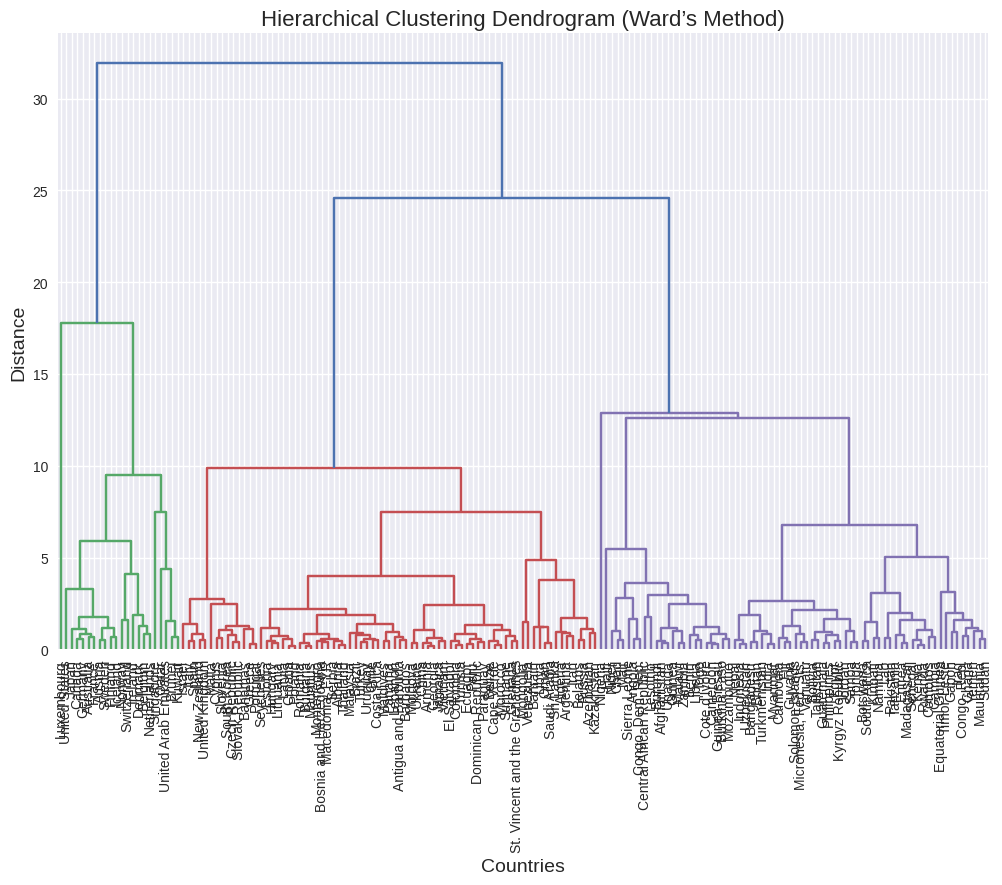

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply hierarchical clustering
Z = linkage(df_scaled, method='ward')  # Ward minimizes the variance of clusters

# Plotting the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=df_clean_scaled.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Ward’s Method)', fontsize=16)
plt.xlabel('Countries', fontsize=14)
plt.ylabel('Distance', fontsize=14)
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Choose the number of clusters (e.g., 3)
n_clusters = 3
agglo = AgglomerativeClustering(n_clusters=n_clusters)
agglo_labels = agglo.fit_predict(df_scaled)

# Add cluster labels to the DataFrame
df_clean_scaled['agglo_cluster'] = agglo_labels

# Display cluster labels
df_clean_scaled['agglo_cluster'].value_counts()


agglo_cluster
2    75
1    70
0    22
Name: count, dtype: int64

In [ ]:
# Apply PCA to reduce to 3 components for Agglomerative clusters
pca_agglo = PCA(n_components=3)
df_pca_agglo = pca_agglo.fit_transform(df_scaled)

# Create a DataFrame for the PCA-transformed data
df_pca_agglo = pd.DataFrame(data=df_pca_agglo, columns=['PC1', 'PC2', 'PC3'])

# Add the Agglomerative cluster labels and country names
df_pca_agglo['agglo_cluster'] = agglo_labels
df_pca_agglo['country'] = df_clean_scaled.index

# Plot the 3D scatter plot for Agglomerative clusters
fig_agglo = px.scatter_3d(df_pca_agglo,
                          x='PC1',
                          y='PC2',
                          z='PC3',
                          color='agglo_cluster',
                          hover_name='country',  # Shows country names on hover
                          title="Agglomerative Clustering with 3D PCA (Interactive)",
                          labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
                          template='plotly_dark')

# Show the interactive 3D plot for Agglomerative Clustering
fig_agglo.show()


In [ ]:
# Create a DataFrame for the countries and their assigned Agglomerative clusters
countries_agglo_clusters = pd.DataFrame({
    'Country': df_clean_scaled.index,  # Assuming country names are in the index
    'Cluster': df_clean_scaled['agglo_cluster']
})

# Group countries by Agglomerative clusters
agglo_countries_by_cluster = countries_agglo_clusters.groupby('Cluster')['Country'].apply(list).reset_index()

# Display the table of countries in each Agglomerative cluster
agglo_countries_by_cluster


Cluster                                            Country
0        0  [Australia, Austria, Belgium, Brunei, Canada, ...
1        1  [Afghanistan, Angola, Bangladesh, Benin, Bhuta...
2        2  [Albania, Algeria, Antigua and Barbuda, Argent...

In [ ]:
# Count the number of countries per Agglomerative cluster
agglo_cluster_counts = countries_agglo_clusters['Cluster'].value_counts().sort_index()

# Calculate the percentage of countries in each Agglomerative cluster
total_agglo_countries = len(countries_agglo_clusters)
agglo_cluster_percentages = (agglo_cluster_counts / total_agglo_countries) * 100

# Combine counts and percentages into a summary DataFrame for Agglomerative Clustering
agglo_cluster_summary = pd.DataFrame({
    'Cluster': agglo_cluster_counts.index,
    'Number of Countries': agglo_cluster_counts.values,
    'Percentage (%)': agglo_cluster_percentages.values
})

# Display the summary table
agglo_cluster_summary


Cluster  Number of Countries  Percentage (%)
0        0                   22       13.173653
1        1                   70       41.916168
2        2                   75       44.910180

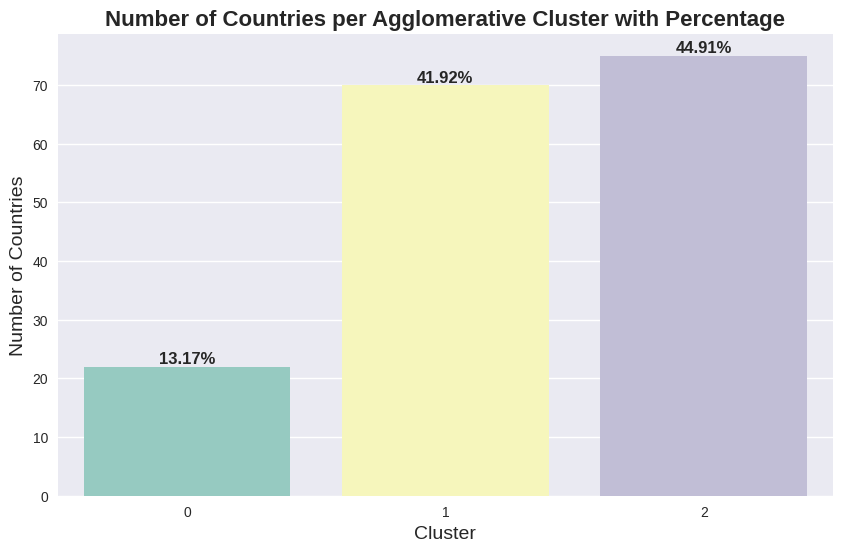

In [ ]:
# Plotting the number of countries in each Agglomerative cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=agglo_cluster_summary['Cluster'],
            y=agglo_cluster_summary['Number of Countries'],
            palette='Set3')

# Adding percentage labels above the bars
for index, value in enumerate(agglo_cluster_summary['Number of Countries']):
    percentage = agglo_cluster_summary['Percentage (%)'].iloc[index]
    plt.text(index, value + 0.5, f'{percentage:.2f}%', ha='center', fontsize=12, weight='bold')

# Setting the labels and title
plt.title('Number of Countries per Agglomerative Cluster with Percentage', fontsize=16, weight='bold')
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Number of Countries', fontsize=14)

# Display the plot
plt.show()


## Comparativa de modelos

# Bibliografía